#  **Introduction**-
This paper shows the insights of funding done by startups and how growth changed with several factors. The aim of paper is to get a descriptive overview and a relationship pattern of funding and growth of newly launched startups. Another important point to understand how funding changes with time is an important aspect.
Possible area of interests would be – (Funding ecosystem and time relation, cities as a important factor, which industries, important investors). Dataset we are using contains information of funding of startups  from January 2015 to August 2017.The amount invested is in USD. Aggregation of data w.r.t cities, investors, funding type etc. is required to get an optimized result. Here we done major preprocessing of data and overcome problem of missing data and uncertain distributions. Also, Visualizations are done to find the anomalies and mining patterns from data. It seems to be some cities showing some abnormal behavior when it comes to funding.

Data is in comma seperated values (C.S.V) format

In [ ]:

import os# import command is used for importing external modules

# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

### Impoting libraries

Several builtin and explicit python libraires are used

***pandas and matplotlib are used for data analysis and visualization***

In [ ]:
!pip install squarify

In [ ]:
import numpy as np #used for scientific computation
import pandas as pd #used for data mugging and preprocessing
import matplotlib.pyplot as plt #data visualization library
from pandas import DataFrame as show # dataframe is the optimised structure used here to clean and analyse data
import seaborn as sns # stastical visualization library
import squarify #used to make square area plots
# %matplotlib inline #used in jupyter notebook for interactive visualizations within notebook

## Data Formatting

### Reading and making dataframe of the csv formated file
Here we converted categorical data to 'category' type


Csv file-(startup_funding.csv)- contains the information of all startups(india) from 2015 to 2017


In [ ]:
file='https://docs.google.com/spreadsheets/d/e/2PACX-1vS1U8HMaTT3PIo-v-hmBj4hfhsEq3KVZp3j3Wrk3XwRLHUsASXIl96e6Hmx6BhfwfOZqtBVHNaic2Sd/pub?gid=842745889&single=true&output=csv'
df=pd.read_csv(file,dtype={

    'InvestmentType':'category'

})#read_csv function is used to import dataset 'startup_funding.csv'



## Sample of our dataset (startup_funding.csv)



In [ ]:
df.head(4)#display first 4 rows of dataframe

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN


In [ ]:
df.tail(4)#display first 4 rows of dataframe

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"
2371,2371,31/01/2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,"140,000",NaN


## Metadata


Columns and index information

In [ ]:
print("Information of total number of non-empty columns")
print("-------------------------------------------------")
print(df.info(null_counts=True))

Information of total number of non-empty columns
-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   SNo               2372 non-null   int64   
 1   Date              2372 non-null   object  
 2   StartupName       2372 non-null   object  
 3   IndustryVertical  2201 non-null   object  
 4   SubVertical       1436 non-null   object  
 5   CityLocation      2193 non-null   object  
 6   InvestorsName     2364 non-null   object  
 7   InvestmentType    2371 non-null   category
 8   AmountInUSD       1525 non-null   object  
 9   Remarks           419 non-null    object  
dtypes: category(1), int64(1), object(8)
memory usage: 169.6+ KB
None


<ipython-input-8-8425939e6060>:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  print(df.info(null_counts=True))


### Dimentions of dataframe


In [ ]:
print('Rows {rows} in total and Columns {columns} in total'.format(rows=df.shape[0],columns=df.shape[1]))

Rows 2372 in total and Columns 10 in total


# Cleaning Data

## Problem

####Dataset dosen't seems to be in  proper format


In [ ]:
print("Columns and their datatypes")
df.dtypes #.dtypes are used to display datatypes of each column

Columns and their datatypes


SNo                    int64
Date                  object
StartupName           object
IndustryVertical      object
SubVertical           object
CityLocation          object
InvestorsName         object
InvestmentType      category
AmountInUSD           object
Remarks               object
dtype: object

## Repersentation of missing data

- Since we can see that 'remarks' has the higher density of missing data,we can neglect this column
- Here we can use estimated statistical values of available data of attribute('AmountInUSD') to fill the missing values



## Dataframe contains lots of NaN(null values) i.e missing data

In [ ]:
print("Frequency count of missing values")
df.apply(lambda X:sum(X.isnull()))
#apply function is used to do mapping column-wise
#apply function can apply tranformations to each column individually

Frequency count of missing values


SNo                    0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
CityLocation         179
InvestorsName          8
InvestmentType         1
AmountInUSD          847
Remarks             1953
dtype: int64

### ***Here yellow bars repersent the null values(missing values)***
- x axis represents  colums(features)  of dataset


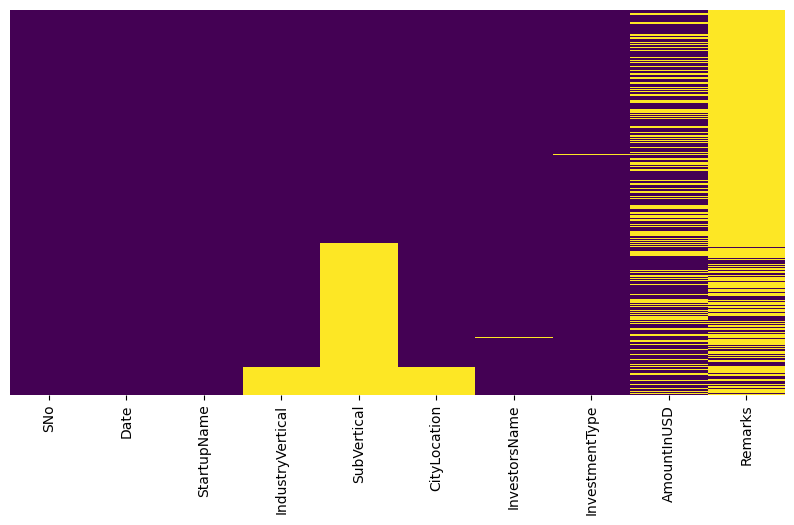

In [ ]:

plt.figure(figsize=(10,5)) #plt is the object of matplot lib and .figure() is used to show or change properties of graphs
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False,cbar=False)#heatmaps are matrix plots which can visualize data in 2D
plt.show()


### Specifying format error

Some dates are not formated where generalized format is 'dd/mm/yy'



In [ ]:
print("Here we can see in date column error- '.' is there instead of '/'")
df[df['Date']=='12/05.2015']['Date']


Here we can see in date column error- '.' is there instead of '/'


2103    12/05.2015
2104    12/05.2015
Name: Date, dtype: object

### Amount in usd has a delemiter  ',' which cannot be processed because of (notnumeric) chracters and null values(missing data)
datatype is String and alot of missing values in Amount given For funding

In [ ]:
df['AmountInUSD'].head(5)#head(n) displays n rows

0    1,300,000
1          NaN
2          NaN
3      500,000
4      850,000
Name: AmountInUSD, dtype: object

# Solving problem with missing data
- WE CAN FILL THE MISSING NUMERICAL VALUES USING FOLLWING STATISTICAL METHODS-
      -BY MODE OF CENTRAL TENDENCY
    
        - BACKWARD FILLING
    
        -FORWARD FILLING
    
        -INTERPOLATION(LINEAR)
    

## Cleaning missing data and formatting


### Cities and IndustryVertical  columns are interpolated  but not with respect to avalaible data
- replacing missing data with 'NotSpecific' label   and 'Other' respectively[](http://)


In [ ]:
df['CityLocation']=df['CityLocation'].fillna(value='NotSpecific')

In [ ]:
df['IndustryVertical']=df['IndustryVertical'].fillna(value='Other')

### Formatting citylocation

1.   List item
2.   List item


#### City column is having multiple city names for some records

In [ ]:
import re#importing regular expressions
def convert_Slash(x):#converts citylocation where multiple citiescentres
    x=x.lower()#converting  whole data to lower case to avoid dublicate entries
    if   re.search('/',x):
        return x.split('/')[0].strip()#converting multiple citycentres to single one
    else :
        return x.strip()# removing extra spaces from left and right to reduce duplicate cities
df['CityLocation']=df['CityLocation'].apply(convert_Slash)

## Backup of dataframe
### Deleting Insignificant columns
*  ***Here as we can  see that 'Remarks column has very high missing data frequency so "Remarks" column is not useful and will create bias in analysis***
* ***Serial number is not useful and hence deleted  as data is organised according to Date column***


In [ ]:
newdf=df.copy()#backup cleansed data
del newdf['Remarks']#remaks is deleted to overcome stability in analysis
del newdf['SNo']

> ### Investment type column has repeated values of categories
#### Categories have alphabetical error
This column has unformatted categories which results in repetition error(spaces between words)
Extra spaces in categories of Investment type will create duplicate categories
For example Here -'Seed Funding' and 'SeedFunding' are same  and can cause data duplicacy




In [ ]:
print('Different categories of Inverstment Type before cleansing and removing duplicacy in categories are as follows- ')
newdf['InvestmentType'].value_counts().index
# aggregating frequency count according to categories of investment type

Different categories of Inverstment Type before cleansing and removing duplicacy in categories are as follows- 


CategoricalIndex(['Seed Funding', 'Private Equity', 'SeedFunding',
                  'Crowd Funding', 'Crowd funding', 'Debt Funding',
                  'PrivateEquity'],
                 categories=['Crowd Funding', 'Crowd funding', 'Debt Funding', 'Private Equity', 'PrivateEquity', 'Seed Funding', 'SeedFunding'], ordered=False, dtype='category')

In [ ]:
print('Different categories of Inverstment Type after cleansing and removing duplicacy in categories are as follows- ')
newdf['InvestmentType']=newdf['InvestmentType'].apply(lambda x:x.replace(' ','').lower())#code to apply mapping to remove duplicate categories
newdf['InvestmentType'].value_counts().index

Different categories of Inverstment Type after cleansing and removing duplicacy in categories are as follows- 


Index(['seedfunding', 'privateequity', 'crowdfunding', 'debtfunding'], dtype='object')

## Fomatting dates to time series

In [ ]:
def rem_err_date(x):#function checks for error in format of date column in funding dataframe
    if re.search('.',x):#data column has formatting errors like '12/052015','13/042015' where backslash (/) is missing or at wrong position
        return x.replace('.','')
    return x

newdf['Date']=newdf['Date'].apply(rem_err_date)#applying user defined funciton to date column using apply() which maps u.d.f to each record of date column
newdf['Date'].replace('12/052015','12/05/2015',inplace=True)
newdf['Date'].replace('15/012015','15/01/2015',inplace=True)
newdf['Date'].replace('22/01//2015','22/01/2015',inplace=True)
newdf['Date'].replace('13/042015','13/04/2015',inplace=True)
newdf['Date']=pd.to_datetime(newdf['Date'],format='%d/%m/%Y')#d/m/y is the format and to_datetime() is used to convert the datatype of date column to "datetime" from string

In [ ]:
print('Processed datatype of Date column')
newdf.dtypes['Date']

Processed datatype of Date column


dtype('<M8[ns]')

## Preprocessing number of investors for each startup
   - As various startups have multiple number of investors arrange according to the number of investors for a particular startup(startup name)

In [ ]:
def calculate_n_investors(x):#function to calculate record wise number of investors
    if  re.search(',',x) and x!='empty':
        return len(x.split(','))
    elif x!='empty':
        return 1
    else:
        return -1
newdf['numberofinvestors']=newdf['InvestorsName'].replace(np.NaN,'empty').apply(calculate_n_investors)#removing missing investors and replacing with 'empty'

In [ ]:
n_inv2=newdf

n_inv=newdf['InvestorsName']
n_inv.fillna(value='None',inplace=True)
listed_n_inv=n_inv.apply(lambda x: x.lower().strip().split(','))
investors=[]
for i in listed_n_inv:
    for j in i:
        if(i!='None' or i!=''):
            investors.append(j.strip())
unique_investors=list(set(investors))


In [ ]:
investors=pd.Series(investors)
unique_investors=pd.Series(unique_investors)

In [ ]:
investors=list(investors[investors!=''])
unique_investors=list(unique_investors[unique_investors!=''])


In [ ]:
for i in range(len(unique_investors)):
    for j in range(len(investors)):
        if(re.search(unique_investors[i],investors[j])):
            investors[j]=unique_investors[i]


### FILLING MISSING VALUES IN  AmountInUSD

AmountinUSD column is formatted to integer

In [ ]:
def convert_AmountInUSD(x):
    if re.search(',',x):
        return (x.replace(',',''))
    return x
newdf['AmountInUSD']=newdf[newdf['AmountInUSD'].notnull()]['AmountInUSD'].apply(convert_AmountInUSD).astype('int')

In [ ]:
newdf['AmountInUSD']=round(newdf['AmountInUSD'].fillna(np.mean(newdf['AmountInUSD'])))
newdf['AmountInUSD']=newdf['AmountInUSD'].astype('int')

### FILLING MISSING VALUES IN  InvestmentType

In [ ]:
newdf['InvestmentType'].fillna(method='bfill',inplace=True)#backward filling of null values

**Converting data into lower case to avoid duplicacy**

In [ ]:
newdf.iloc[:,[1,2,3,4,6]]=newdf.iloc[:,[1,2,3,4,6]].applymap(lambda x: x.lower().replace(' ','') if pd.notnull(x) is True else x )

In [ ]:

def check(x):
    if(pd.notnull(x)):
        return x.lower()
newdf.iloc[:,3]=newdf.iloc[:,3].apply(check)


### Analysis of data after cleaning
 - here yellow bars represent the Missing data(NULL values)


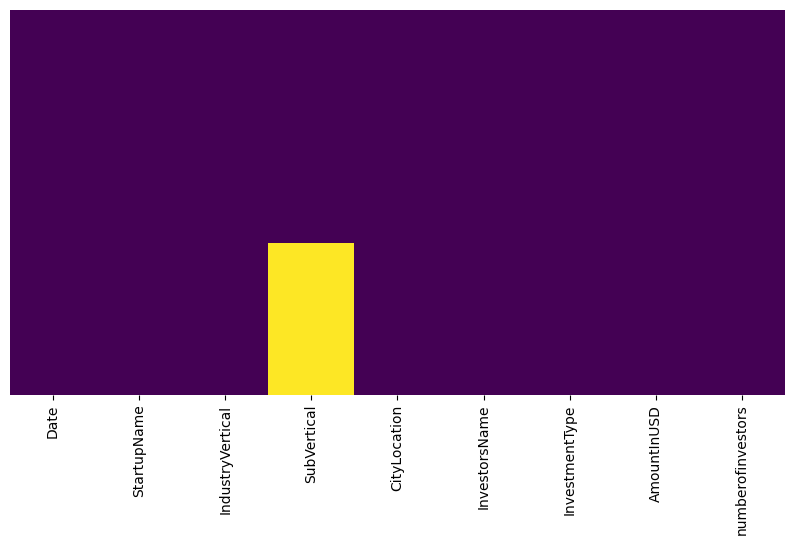

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(newdf.isnull(),cmap='viridis',yticklabels=False,cbar=False)
plt.show()

****[italicised text](https://)*Removing ambigous records(startup names like flipkart and flipkart.com )**

In [ ]:
unique_startup_name=list(newdf['StartupName'].unique())
startupname=list(newdf['StartupName'])

In [ ]:
for i in range(len(unique_startup_name)):
    for j in range(len(startupname)):
        if(re.search(unique_startup_name[i],startupname[j])):
            startupname[j]=unique_startup_name[i]


In [ ]:
newdf['StartupName']=startupname

In [ ]:
newdf.head(10)

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,numberofinvestors
0,2017-08-01,touchkin,technology,predictivecareplatform,bangalore,Kae Capital,privateequity,1300000,1
1,2017-08-02,ethinos,technology,digitalmarketingagency,mumbai,Triton Investment Advisors,privateequity,12031073,1
2,2017-08-02,leverageedu,consumerinternet,onlineplatformforhighereducationservices,newdelhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",seedfunding,12031073,7
3,2017-08-02,zepo,consumerinternet,diyecommerceplatform,mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",seedfunding,500000,4
4,2017-08-02,click2clinic,consumerinternet,healthcareserviceaggregator,hyderabad,"Narottam Thudi, Shireesh Palle",seedfunding,850000,2
5,2017-07-01,billionloans,consumerinternet,peertopeerlendingplatform,bangalore,Reliance Corporate Advisory Services Ltd,seedfunding,1000000,1
6,2017-07-03,ecolibriumenergy,technology,energymanagementsolutionsprovider,ahmedabad,"Infuse Ventures, JLL",privateequity,2600000,2
7,2017-07-04,droom,ecommerce,onlinemarketplaceforautomobiles,gurgaon,"Asset Management (Asia) Ltd, Digital Garage Inc",privateequity,20000000,2
8,2017-07-05,jumbotail,ecommerce,onlinemarketplaceforfoodandgrocery,bangalore,"Kalaari Capital, Nexus India Capital Advisors",privateequity,8500000,2
9,2017-07-05,moglix,ecommerce,b2bmarketplaceforindustrialproducts,noida,"International Finance Corporation, Rocketship,...",privateequity,12000000,6



# Indepth Analytics


In [ ]:
newdf.head()

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,numberofinvestors
0,2017-08-01,touchkin,technology,predictivecareplatform,bangalore,Kae Capital,privateequity,1300000,1
1,2017-08-02,ethinos,technology,digitalmarketingagency,mumbai,Triton Investment Advisors,privateequity,12031073,1
2,2017-08-02,leverageedu,consumerinternet,onlineplatformforhighereducationservices,newdelhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",seedfunding,12031073,7
3,2017-08-02,zepo,consumerinternet,diyecommerceplatform,mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",seedfunding,500000,4
4,2017-08-02,click2clinic,consumerinternet,healthcareserviceaggregator,hyderabad,"Narottam Thudi, Shireesh Palle",seedfunding,850000,2


### Here we can see that best way to classify is to check the amount of funding and
### The City Date is a time series which can show desired insights according to frequency

- Funding of startups are highly dispersed and shown as investors are highly specific about startups


In [ ]:
show(newdf.describe()['AmountInUSD'].astype(int))

,AmountInUSD
count,2372
mean,12031073
std,51335545
min,16000
25%,700000
50%,7300000
75%,12031073
max,1400000000


How many unique startups are introduced in year between 2015-2017?


In [ ]:
print(newdf['StartupName'].nunique())


1792


# Top 10 startups had most funding
paytm and flipkart were on the top of the run


In [ ]:
tp10fund=show(newdf.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending=False))
tp10fund.head(10)


,AmountInUSD
StartupName,
paytm,2364062146
flipkart,2259700000
ola,2001391292
snapdeal,700000000
oyo,661062146
quikr,230000000
delhivery,215000000
cartrade,212031073
foodpanda,210000000


## WordCloud of best startups and sectors by amount of funding

> Indented block




<ipython-input-42-af856abce793>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  st=pd.Series(newdf.groupby('StartupName').sum()['AmountInUSD'].sort_values(ascending=False).head(40).index).head(30)


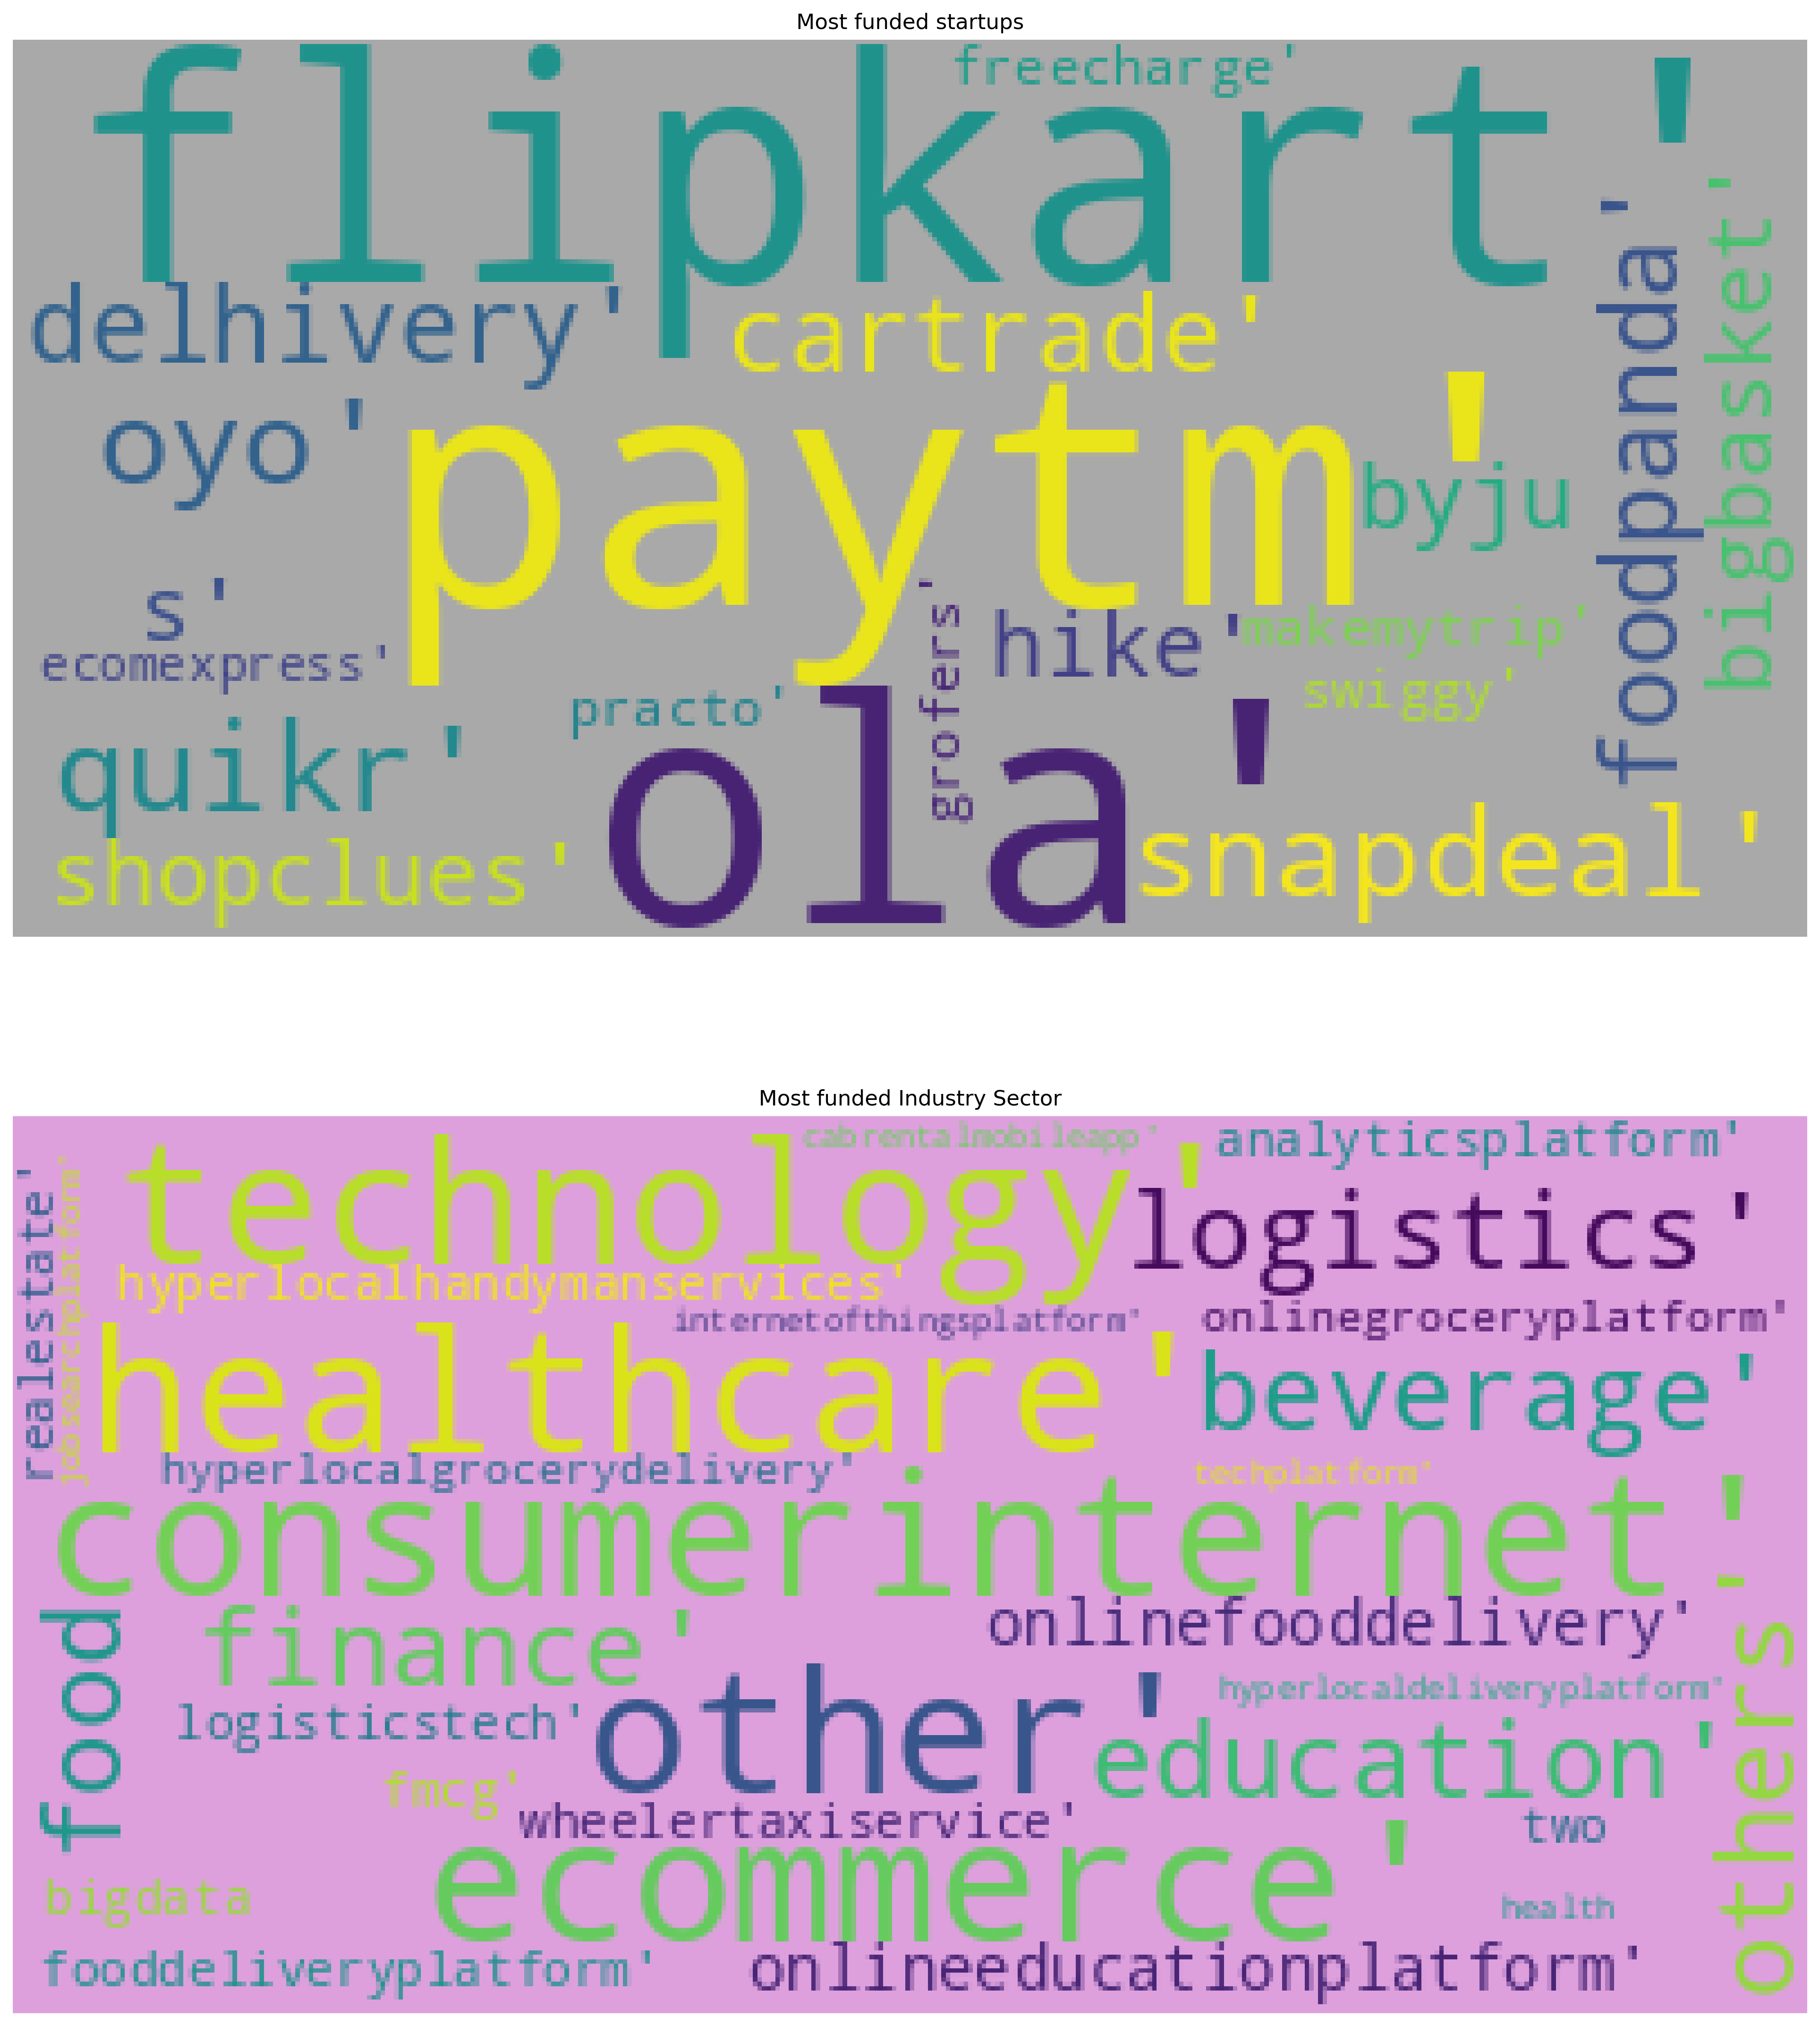

In [ ]:
from wordcloud import WordCloud, STOPWORDS


st=pd.Series(newdf.groupby('StartupName').sum()['AmountInUSD'].sort_values(ascending=False).head(40).index).head(30)
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(20,20),dpi=300)

for char in range(len(st)):
    st[char]=st[char].replace(' ','_')

wc=WordCloud(max_words=20,stopwords=set(st),background_color='darkgrey',random_state=0).generate(str(st.values[:30]))
ax[0].axis('off')
ax[0].set_title('Most funded startups')
ax[0].imshow(wc)


c=np.array(newdf['IndustryVertical'].value_counts().head(30).index.unique())
for char in range(len(c)):
    c[char]=c[char].replace(' ','_')


wc=WordCloud(max_words=30,stopwords=set(c),background_color='plum',random_state=1).generate(str(c))

ax[1].axis('off')
ax[1].set_title('Most funded Industry Sector')

ax[1].imshow(wc)
plt.rcParams['axes.facecolor'] = 'white'


#### DETAILS OF TOP 10 STARTUPS AS PER THE FUND GENERATED
   Below is the details about the top 10 startups on different Dates

In [ ]:
#details of top 10 funded startups
def find(x):
    if x in tp10fund.head(10).index:
        return True
    return False

n=newdf[newdf['StartupName'].apply(find)]
print('amount funded on top 10 startups')
n.describe().iloc[:,0]

amount funded on top 10 startups


count    5.800000e+01
mean     1.562232e+08
std      2.859792e+08
min      1.470000e+05
25%      1.203107e+07
50%      5.750000e+07
75%      1.362500e+08
max      1.400000e+09
Name: AmountInUSD, dtype: float64

 # Which kind of investment did the top10 startups got

 The top 10 investments were pivate equtiy and hence seed funding is nill

> AS THE TOP 10 FUNDNDING AMOUNT ARE RECEIVED THROUGH PRIVATE EQUITY SO SORTING THE TOP 10 STARTUPS AS PER PRIVATE EQUITY
> BELOW THE PRIVATE EQUITY COLUMN REPRESENTS THE COUNT OF INVESTMENT TYPE

In [ ]:
pd.crosstab(n['StartupName'],columns=n['InvestmentType']).sort_values(by='privateequity',ascending=False)

InvestmentType,privateequity,seedfunding
StartupName,,
ola,16,7
oyo,6,2
paytm,6,0
flipkart,5,0
cartrade,3,0
delhivery,3,0
quikr,3,0
shopclues,3,0
foodpanda,2,0


## Insights regarding the best startup in terms of funding amount

In [ ]:
newdf[newdf['StartupName']=='paytm']

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,numberofinvestors
158,2017-05-18,paytm,ecommerce,mobilewallet&ecommerceplatform,bangalore,SoftBank Group,privateequity,1400000000,1
266,2017-03-03,paytm,ecommerce,ecommercemarketplace,bangalore,Alibaba,privateequity,200000000,1
821,2016-08-30,paytm,ecommerce,mobilewallet&ecommerceplatform,bangalore,MediaTek Inc.,privateequity,60000000,1
1787,2015-09-29,paytm,e-commerce&m-commerceplatform,None,newdelhi,"Alibaba Group, Ant Financial",privateequity,680000000,2
2218,2015-03-13,paytm,other,None,notspecific,Ratan Tata,privateequity,12031073,1
2276,2015-02-05,paytm,other,None,notspecific,Ant Financial Services (Alipay),privateequity,12031073,1


### Companies with most number of investors


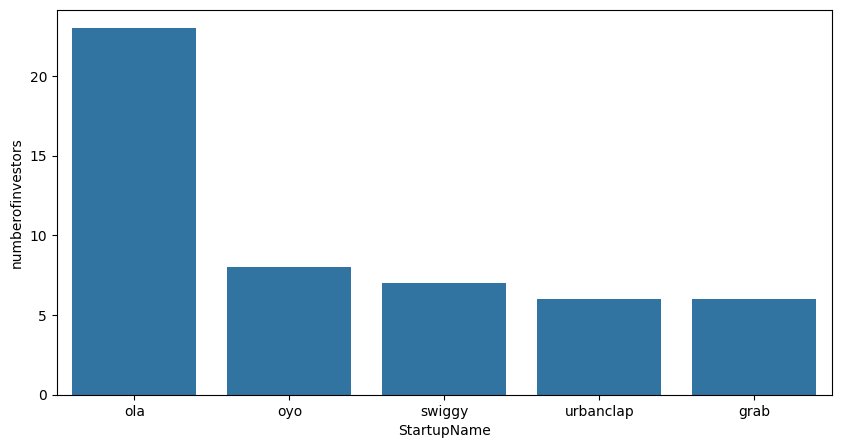

,numberofinvestors
StartupName,
ola,23
oyo,8
swiggy,7
urbanclap,6
grab,6
paytm,6
faircent,5
jugnoo,5
nobroker,5


In [ ]:

cmi=show(newdf.groupby('StartupName')['numberofinvestors'].count().sort_values(ascending=False))
fig=plt.figure(figsize=(10,5))
sns.barplot(y='numberofinvestors',x='StartupName',data=cmi.reset_index().head())
plt.show()
cmi.head(10)

#### Here we can see that kernel density of startups having two and three number of investors is high

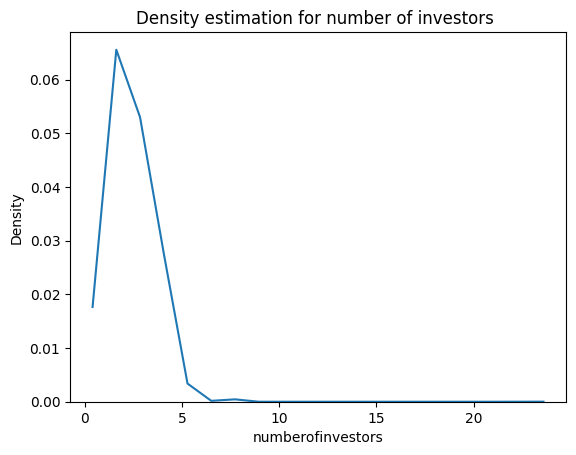

In [ ]:
sns.kdeplot(data=cmi.reset_index()['numberofinvestors'],gridsize=20,)#most are  2 or 3 in number
plt.title('Density estimation for number of investors ')
plt.show()

### Is funding depends upon number of investors
- here we can see that there is 50% relation between funding amount and number of investors

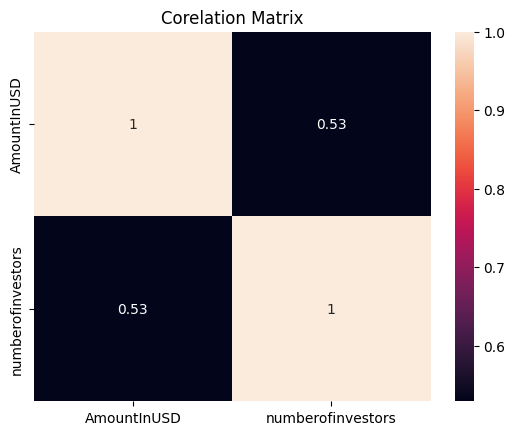

In [ ]:
top10=tp10fund.join(cmi)
sns.heatmap(top10.corr(),annot=True)
plt.title('Corelation Matrix')
plt.show()


### Investors  

### what are the total number of unique investors

In [ ]:
show(investors)[0].nunique()

1965

In [ ]:
#investors with most funding
sh=show(investors)[0].unique()

### Investors with most funding frequency

In [ ]:
cinvestors=show(investors)[0].value_counts()[2:]
cinvestors.head(10)

e.ventures              112
sequoia capital          75
accel                    73
kalaari capital          51
saif partners            46
indian angel network     43
tiger global             40
ratan tata               30
idg                      28
inc                      26
Name: 0, dtype: int64

Top Investors in Frequency 


<ipython-input-52-a2956227cc20>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar.set_xticklabels(bar.get_xticklabels(),rotation=70)


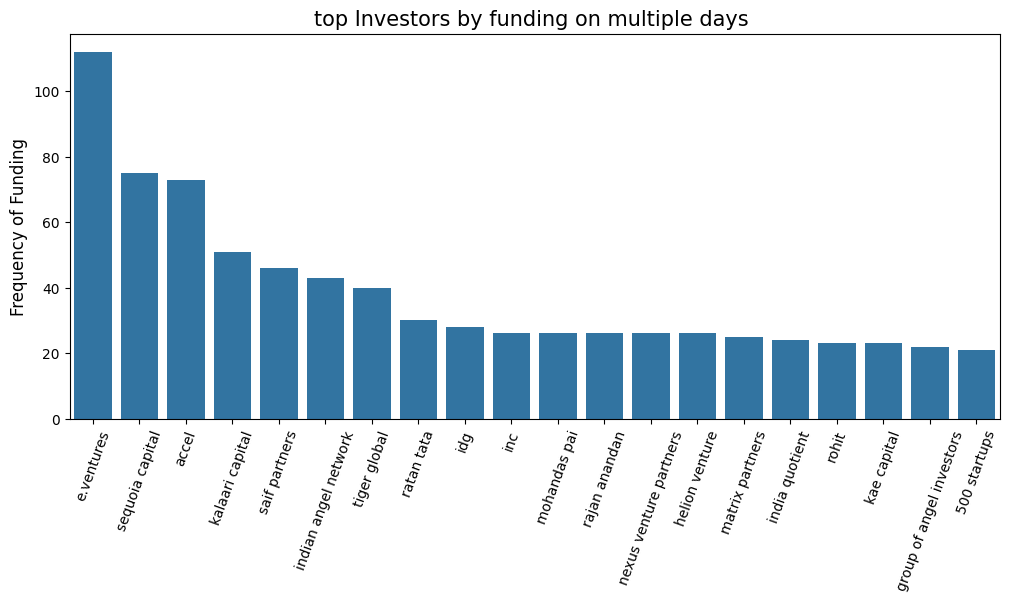

In [ ]:
print("Top Investors in Frequency ")
plt.figure(figsize = (12,5))
bar= sns.barplot(x=cinvestors.index[:20],y=cinvestors.values[:20])
bar.set_xticklabels(bar.get_xticklabels(),rotation=70)
bar.set_title("top Investors by funding on multiple days ", fontsize=15)
bar.set_xlabel("", fontsize=12)
bar.set_ylabel("Frequency of Funding", fontsize=12)
plt.show()

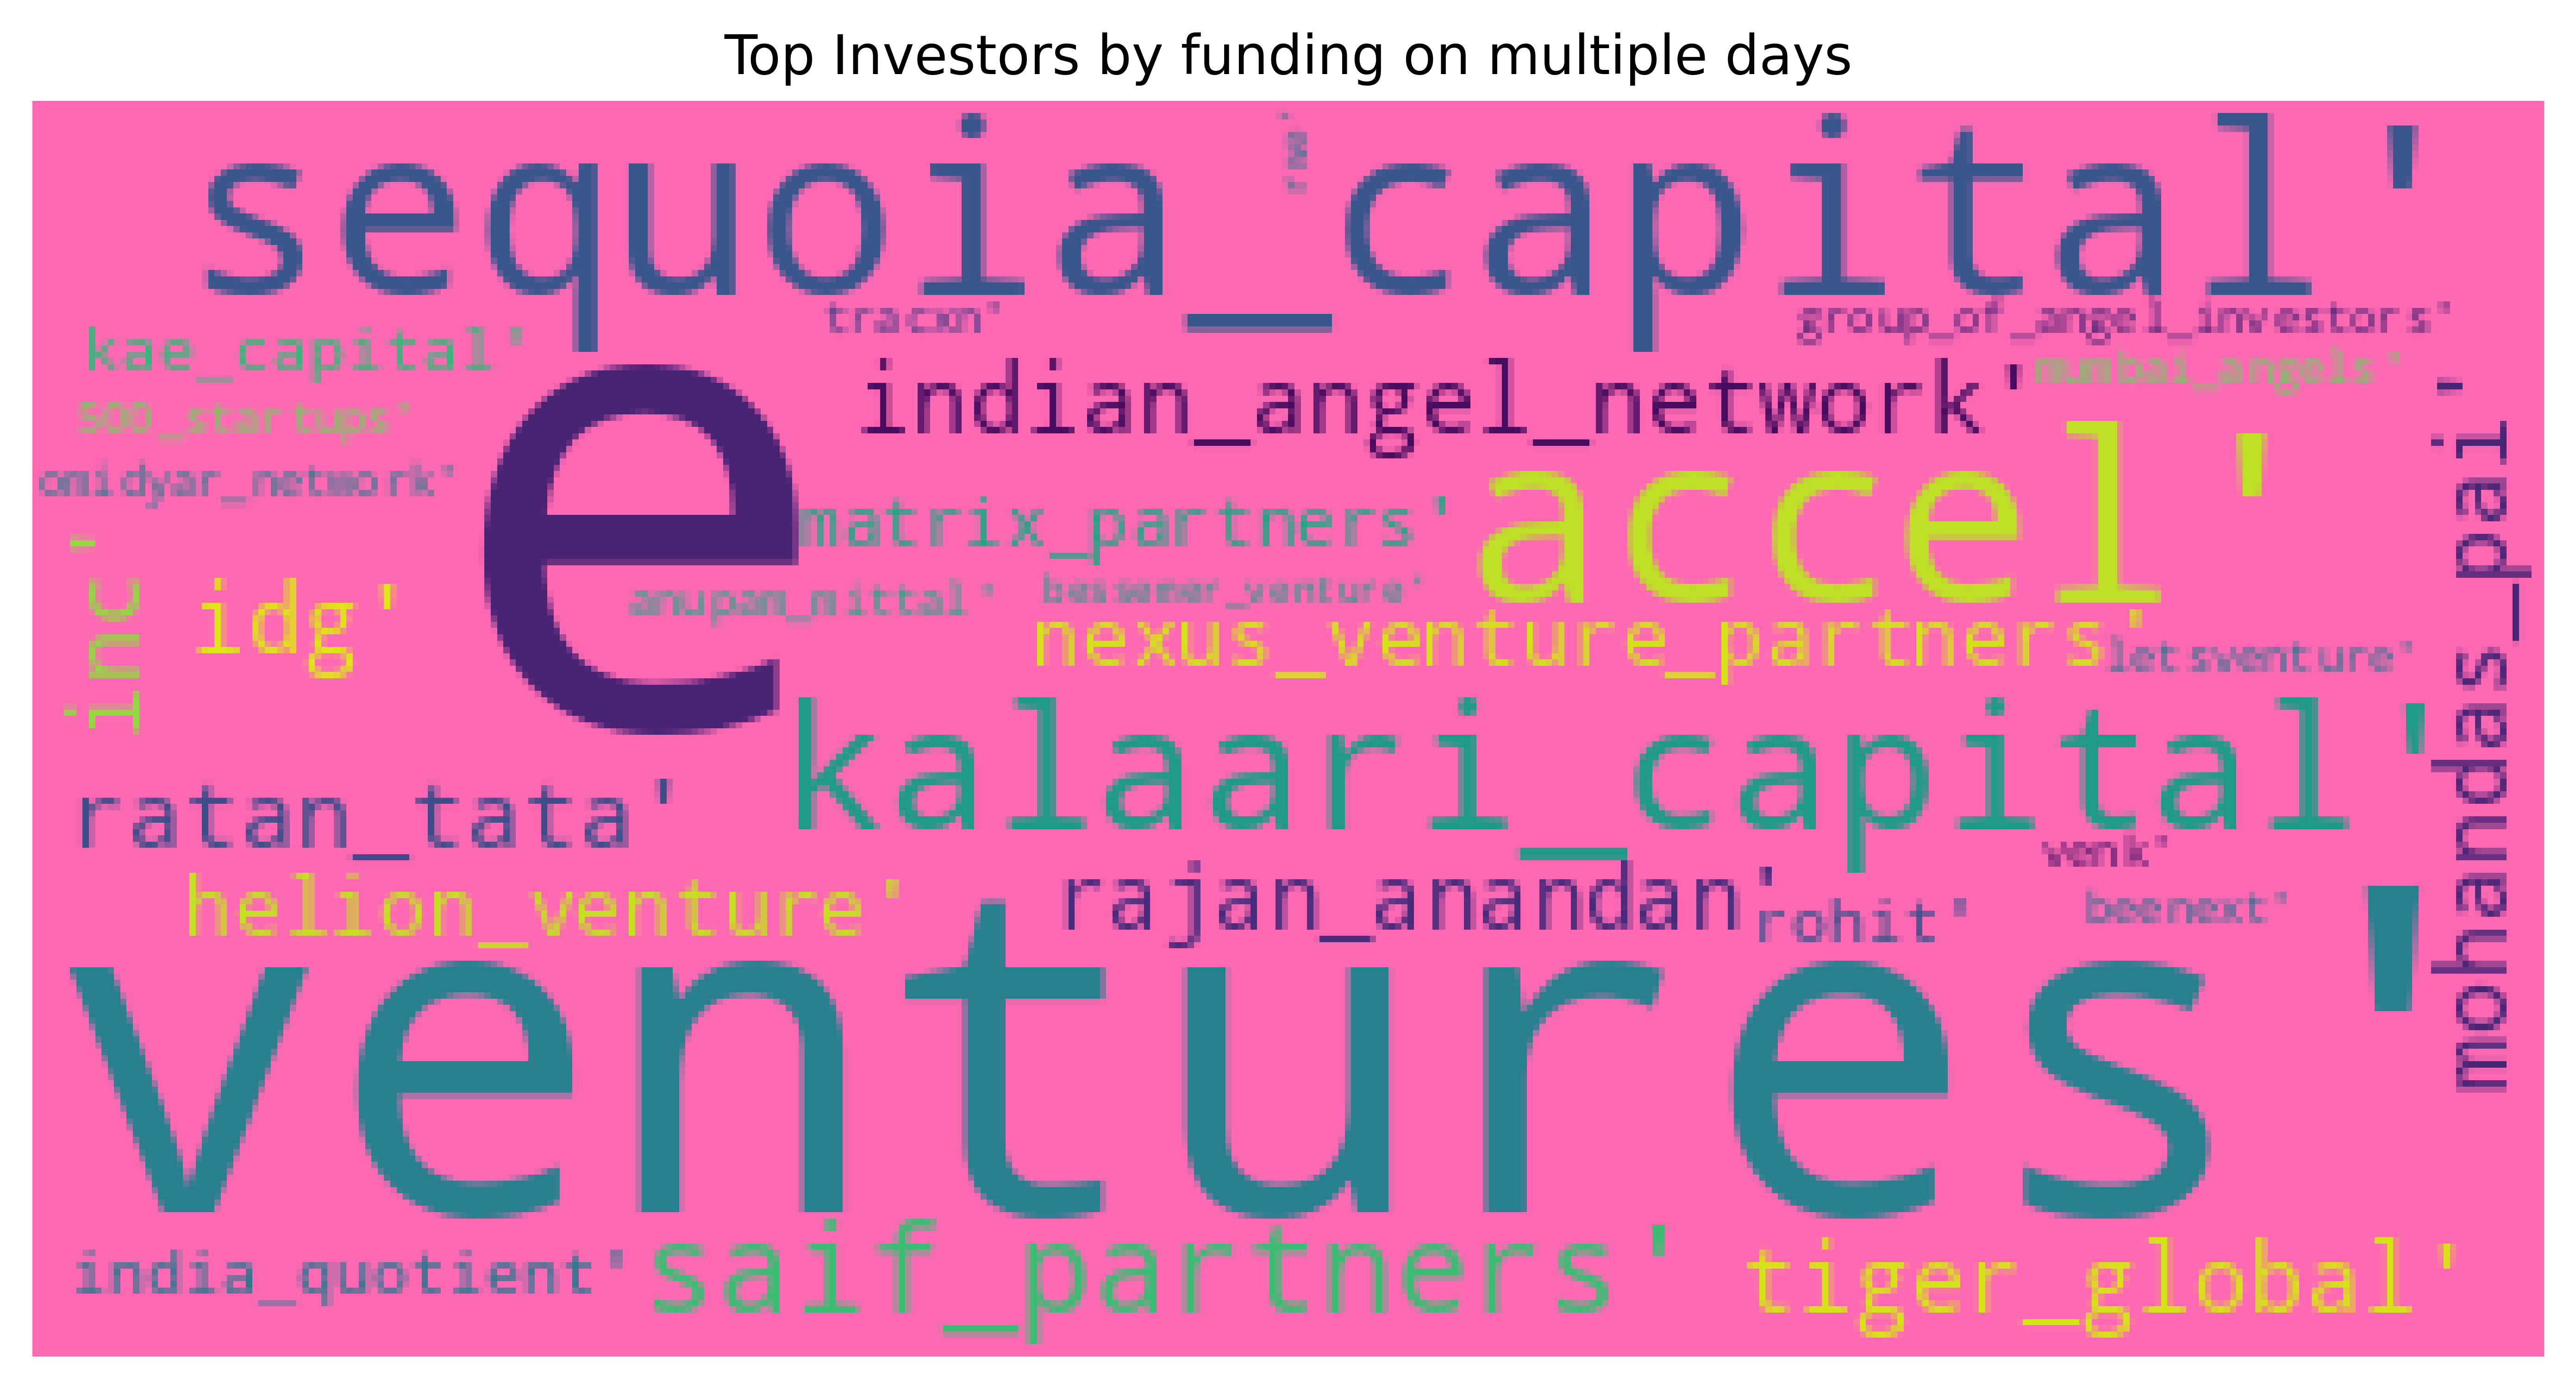

In [ ]:
Investors=cinvestors.index
arr =np.array(Investors)
for investor in range(len(arr)):
    arr[investor]=arr[investor].strip()
    arr[investor]=arr[investor].replace(' ','_')
    arr[investor]=arr[investor].replace("'",'')
    arr[investor]=arr[investor].replace("",'')

Ind=show(arr)[0].apply(lambda x: x.strip().lower())
Ind=Ind.values
fig=plt.figure(figsize=(10,10),dpi=700)

wc=WordCloud(max_words=30,stopwords=set(Ind),background_color='hotpink',random_state=1).generate(str(Ind[:30]))
plt.axis('off')
plt.title('Top Investors by funding on multiple days')
plt.imshow(wc)
plt.show()



### Top 10 Investors with highest funding amount

Calculating indivdual investor funding for startups who got funding by multiple investors on same day by assuming average funding contribution

In [ ]:
d=dict()#to store individual investors and funding amount in key-value pairs
for i in unique_investors:
    for j in range(len(listed_n_inv)):
        if i in listed_n_inv[j]:
            d[i]=newdf['AmountInUSD'][j]/len(listed_n_inv[j])#taking average of amount



In [ ]:
Investor_amount=pd.Series(d,name='Amount')

Investor_amount=show(Investor_amount,).reset_index().groupby('index').sum()['Amount'].sort_values(ascending=False).head(100)
Investor_amount=show(Investor_amount).reset_index()
Investor_amount.columns=["Investor","Amount"]


Top 10 Most funded Investors
                                   Investor        Amount
0  steadview capital and existing investors  7.000000e+08
1                                 microsoft  4.666667e+08
2                             alibaba group  3.400000e+08
3                       softbank group corp  3.300000e+08
4                          simi pacific pte  2.600000e+08
5   ontario teachers’ pension plan & others  2.000000e+08
6               ctrip.com international ltd  1.800000e+08
7                                   alibaba  1.666667e+08
8                              abraaj group  1.500000e+08
9                            warburg pincus  1.370000e+08


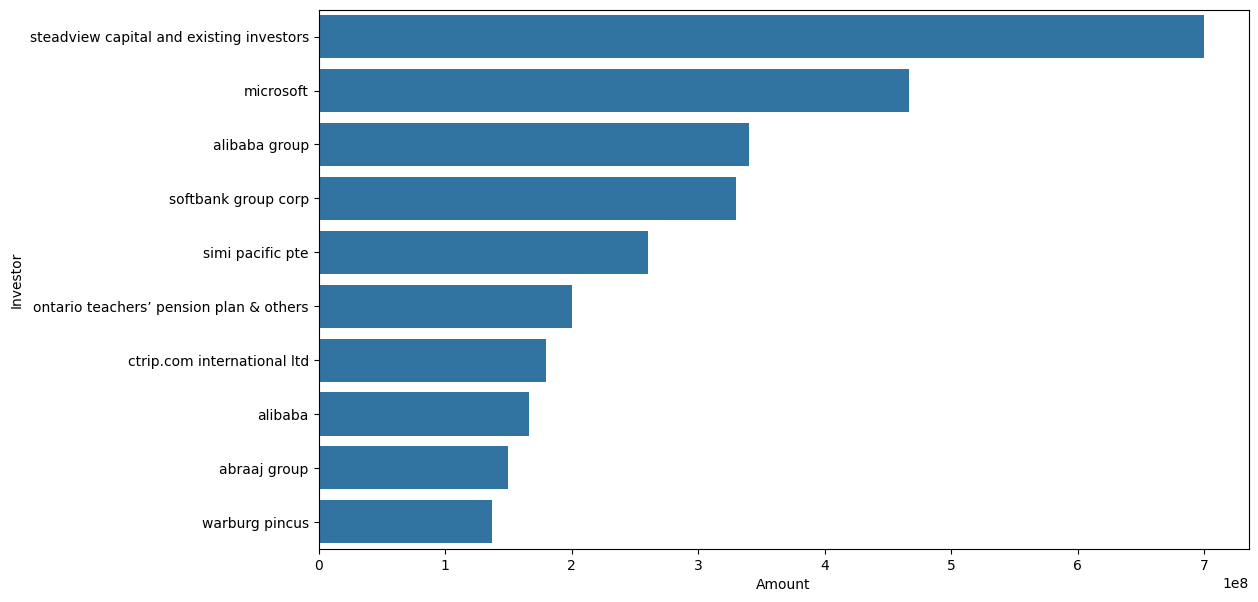

In [ ]:
print('Top 10 Most funded Investors')
plt.figure(figsize=(12,7))
sns.barplot(y='Investor',x='Amount',data=Investor_amount.head(10))
print(Investor_amount.head(10))
plt.show()


###  Which industry vertical  opted by top  investors?

In [ ]:
top_industry_vertical={}
for i in Investor_amount['Investor'].head(20):
    for j in range(len(listed_n_inv)):
        if i in listed_n_inv[j]:
            top_industry_vertical[i]=newdf['IndustryVertical'][j]


top investor's favourite Industry  
steadview capital and existing investors                onlinemarketplace
microsoft                                                       ecommerce
alibaba group                               e-commerce&m-commerceplatform
softbank group corp                                      consumerinternet
simi pacific pte                                         consumerinternet
ontario teachers’ pension plan & others                         ecommerce
ctrip.com international ltd                              consumerinternet
alibaba                                              ecommercemarketplace
abraaj group                                                    ecommerce
warburg pincus                                  logisticssolutionprovider
rocket internet ag & others                                         other
dst global                                                  cabaggregator
tiger global & other investors                                      other
te

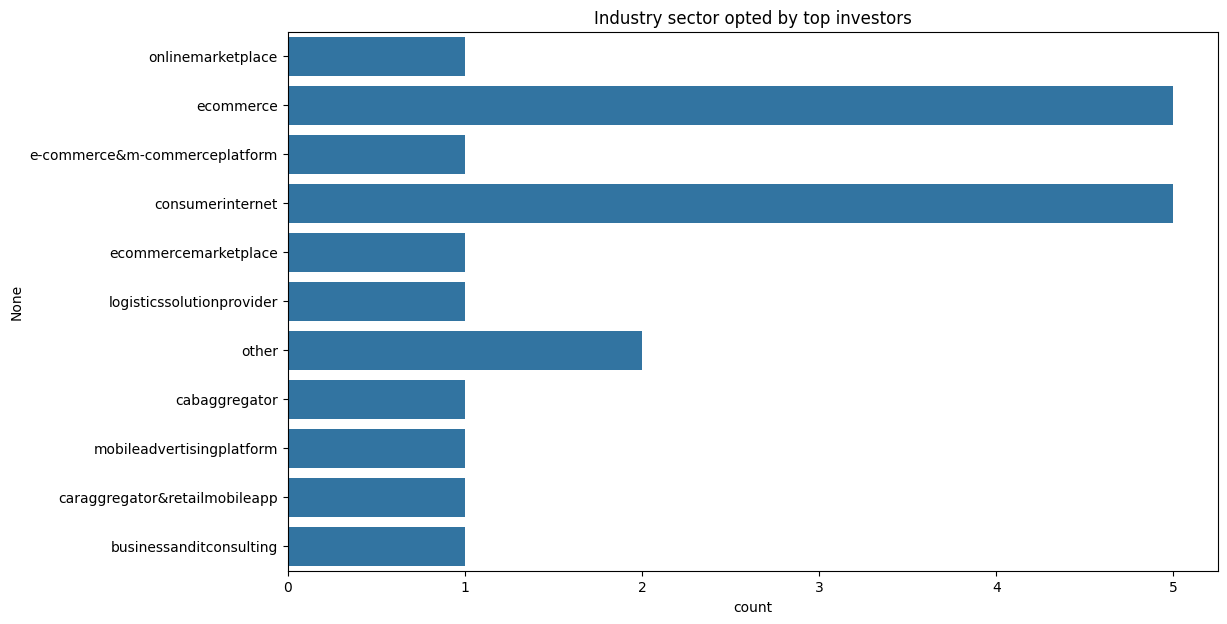

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(y=pd.Series(top_industry_vertical))
plt.title('Industry sector opted by top investors' )
print('top investor\'s favourite Industry  ')
print(pd.Series(top_industry_vertical))
plt.show()

### Pairing of amount and  number of investors :
- here we can see that most funding is generated through privateequity ( in terms of amount )
- most of the startups have seed funding (in terms of funding frequency )

### Total amount of funding recieved as per investment type

In [ ]:
newdf.groupby('InvestmentType').sum()['AmountInUSD']


<ipython-input-59-f584889ad43f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  newdf.groupby('InvestmentType').sum()['AmountInUSD']


InvestmentType
crowdfunding          155768
debtfunding          7800000
privateequity    20882511447
seedfunding       7647238092
Name: AmountInUSD, dtype: int64

### Total number of funding recieved as per investment type

In [ ]:
newdf['InvestmentType'].value_counts()


seedfunding      1302
privateequity    1067
crowdfunding        2
debtfunding         1
Name: InvestmentType, dtype: int64

# Top 10 industry sectors with most funding


### visualization of the growth rate of each sector (industry vertical)
- Here we can see that consumer internet sector has more funding (as per amount)
- Here we can see that consumer internet sector has most frequency
- It also seen that debt funding and crowd funding are negligible as compared to other Investment types


In [ ]:
# converting all industry vertical entries to lower to avoid category duplication
newdf['IndustryVertical']=newdf['IndustryVertical'].apply(lambda x:x.lower())


<ipython-input-62-24a6f42bcf27>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  f=newdf.groupby('InvestmentType').sum()['AmountInUSD']


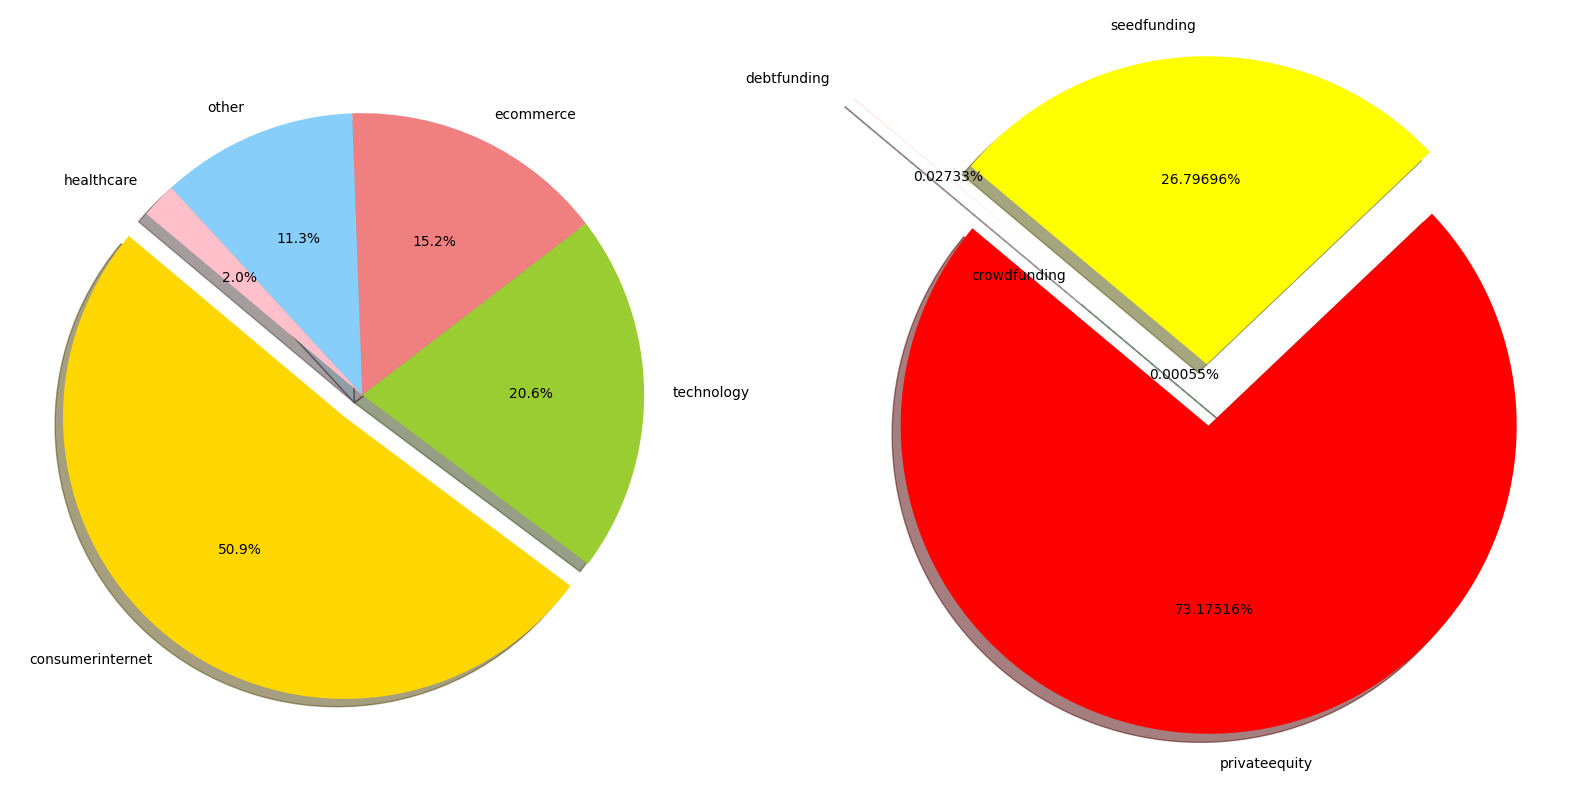

In [ ]:
#in which sector there are most startups
d=newdf['IndustryVertical'].value_counts().head(5)
f=newdf.groupby('InvestmentType').sum()['AmountInUSD']
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
labels=[d.index,f.index]
size=[d.values,f.values]
colors = [['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','pink'],['green','pink','red','yellow']]
plt.axis('equal')
explode = ((0.1, 0, 0, 0,0),(-0.5,0.5,0.1,0.1))
ax[0].pie(size[0],explode=explode[0], labels=labels[0], colors=colors[0],
        autopct='%1.1f%%', shadow=True, startangle=140)

ax[1].pie(size[1],explode=explode[1], labels=labels[1], colors=colors[1],autopct='%1.5f%%', shadow=True, startangle=140)
plt.show()

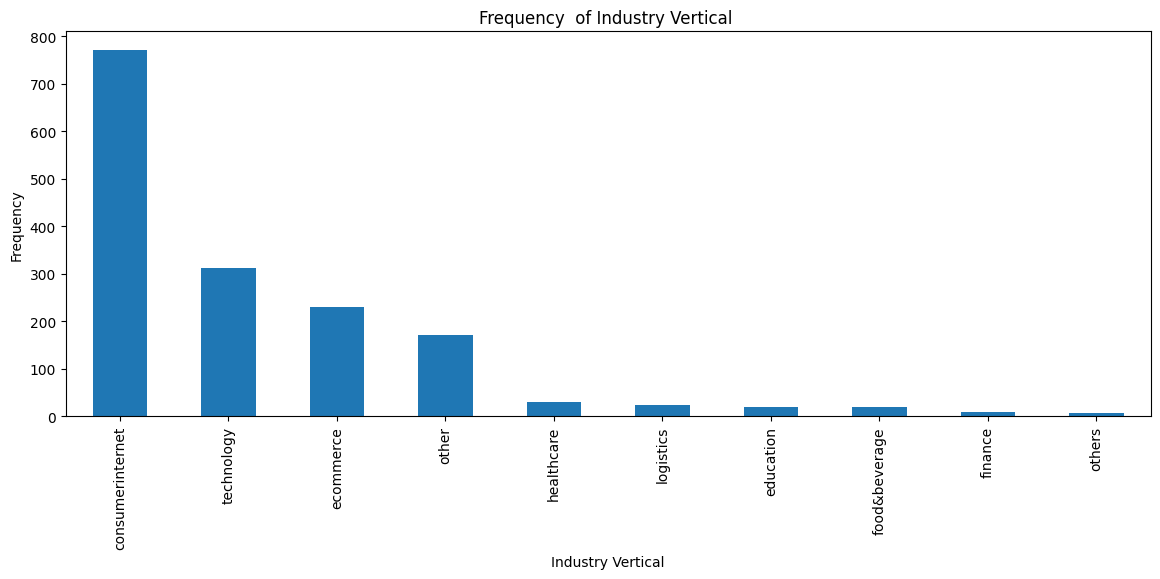

In [ ]:
plt.figure(figsize=(14,5))
iv=newdf['IndustryVertical'].value_counts().head(10)
iv.plot.bar()

plt.title('Frequency  of Industry Vertical ')
plt.ylabel('Frequency')
plt.xlabel('Industry Vertical')
plt.show()

# Most preferrable cities as per Investment on startups
- Insights provided shows that Banglore has the most average funding Amount


<ipython-input-64-4cf7477d95eb>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_amount = newdf.groupby('CityLocation').mean()["AmountInUSD"].astype('int').sort_values(ascending=False).iloc[1:].head(10)


Text(0.5, 1.0, 'Distribution of Startups across Top cities')

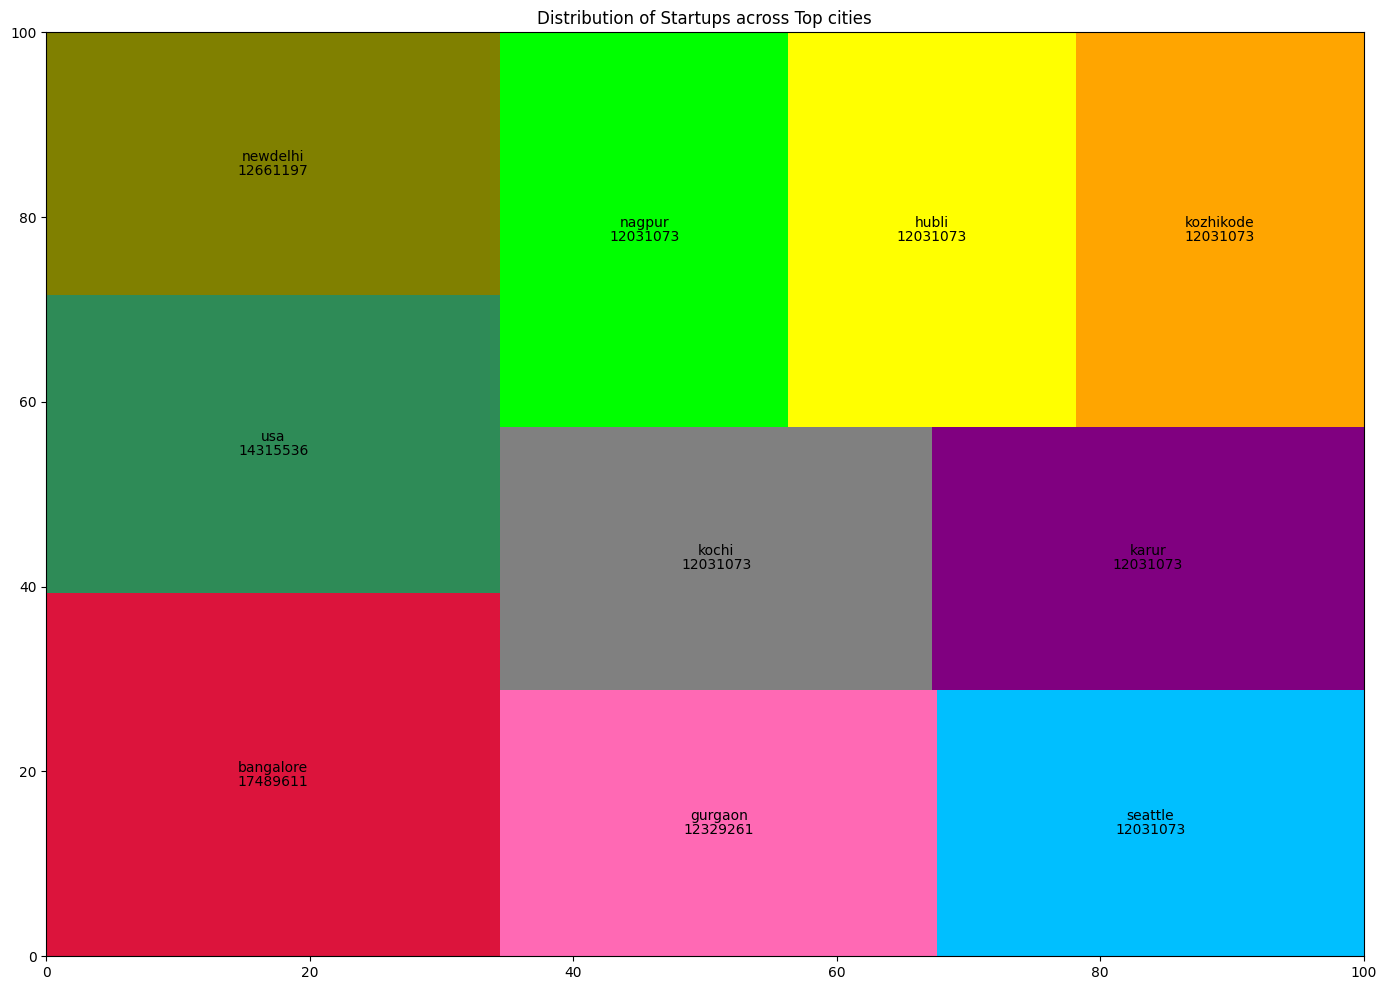

In [ ]:
plt.figure(figsize=(17,12))
mean_amount = newdf.groupby('CityLocation').mean()["AmountInUSD"].astype('int').sort_values(ascending=False).iloc[1:].head(10)
squarify.plot(sizes=mean_amount.values,label=mean_amount.index, value=mean_amount.values,color=['crimson','seagreen','olive','hotpink','deepskyblue','grey','purple','lime','yellow','orange'])
plt.title('Distribution of Startups across Top cities')

###  Here we can see that Ahmedabad is a Market place for dept-funding


<ipython-input-65-484bbe2c3ca1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='CityLocation',x='AmountInUSD',data=newdf[(newdf['InvestmentType']=='debtfunding')|(newdf['InvestmentType']=='crowdfunding')],estimator=np.sum,palette='coolwarm')


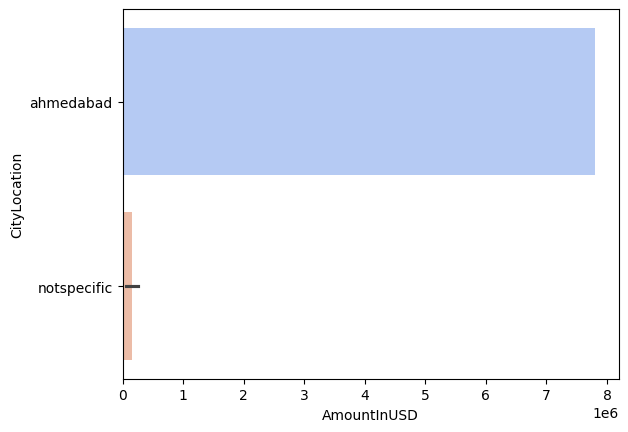

In [ ]:

sns.barplot(y='CityLocation',x='AmountInUSD',data=newdf[(newdf['InvestmentType']=='debtfunding')|(newdf['InvestmentType']=='crowdfunding')],estimator=np.sum,palette='coolwarm')

#average investment in banglore is most
plt.show()
#amehdabad is the market place for dept funding


## Time Series Analysis

In [ ]:
dnewdf=newdf.set_index('Date')
dnewdf.head()

,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,numberofinvestors
Date,,,,,,,,
2017-08-01,touchkin,technology,predictivecareplatform,bangalore,Kae Capital,privateequity,1300000,1
2017-08-02,ethinos,technology,digitalmarketingagency,mumbai,Triton Investment Advisors,privateequity,12031073,1
2017-08-02,leverageedu,consumerinternet,onlineplatformforhighereducationservices,newdelhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",seedfunding,12031073,7
2017-08-02,zepo,consumerinternet,diyecommerceplatform,mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",seedfunding,500000,4
2017-08-02,click2clinic,consumerinternet,healthcareserviceaggregator,hyderabad,"Narottam Thudi, Shireesh Palle",seedfunding,850000,2


In [ ]:
print('total number of unique startups funded in 2017 -'+str(len(dnewdf['2017']['StartupName'].unique())))
print('total number of unique startups funded in 2016 -'+str(len(dnewdf['2016']['StartupName'].unique())))
print('total number of unique startups funded in 2015 -'+str(len(dnewdf['2015']['StartupName'].unique())))


total number of unique startups funded in 2017 -414
total number of unique startups funded in 2016 -889
total number of unique startups funded in 2015 -807


<ipython-input-67-4f471d295c21>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print('total number of unique startups funded in 2017 -'+str(len(dnewdf['2017']['StartupName'].unique())))
<ipython-input-67-4f471d295c21>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print('total number of unique startups funded in 2016 -'+str(len(dnewdf['2016']['StartupName'].unique())))
<ipython-input-67-4f471d295c21>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print('total number of unique startu

### Total funding in 2017



In [ ]:
dnewdf['2017']['AmountInUSD'].sum()

<ipython-input-68-60832eb47ba2>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  dnewdf['2017']['AmountInUSD'].sum()


7747185034

### Total funding in 2016

In [ ]:

dnewdf['2016']['AmountInUSD'].sum()


<ipython-input-69-b44d07184fdc>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  dnewdf['2016']['AmountInUSD'].sum()


8724735319

### total funding in 2015

In [ ]:

dnewdf['2015']['AmountInUSD'].sum()

<ipython-input-70-777e515260d3>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  dnewdf['2015']['AmountInUSD'].sum()


12065784954

### Total funding was most in 2015 and decreased

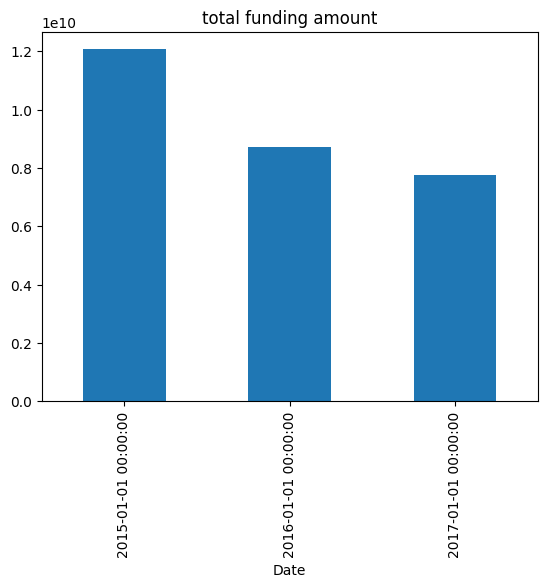

In [ ]:
plt.title('total funding amount')
dnewdf.resample('AS')['AmountInUSD'].sum().plot.bar()
plt.show()

### Plotting Average Year-Start-wise graph for investment in period between January-2015 to Jan-2017 (Annual Starting)



Text(0.5, 1.0, 'average funding amount')

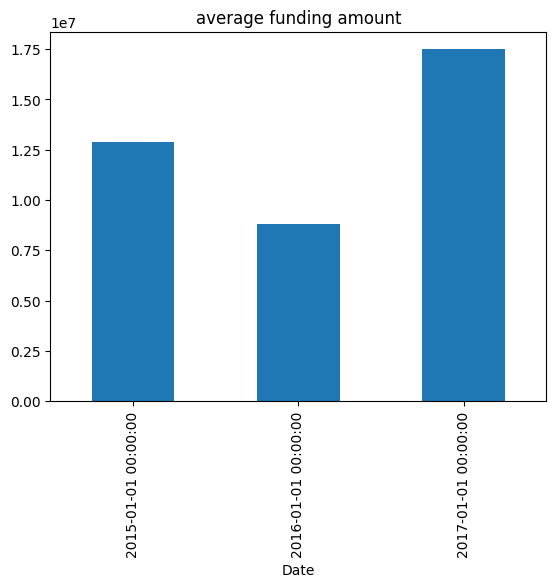

In [ ]:
q=dnewdf['AmountInUSD'].resample('AS').mean()
q.plot(kind='bar')
plt.title('average funding amount')


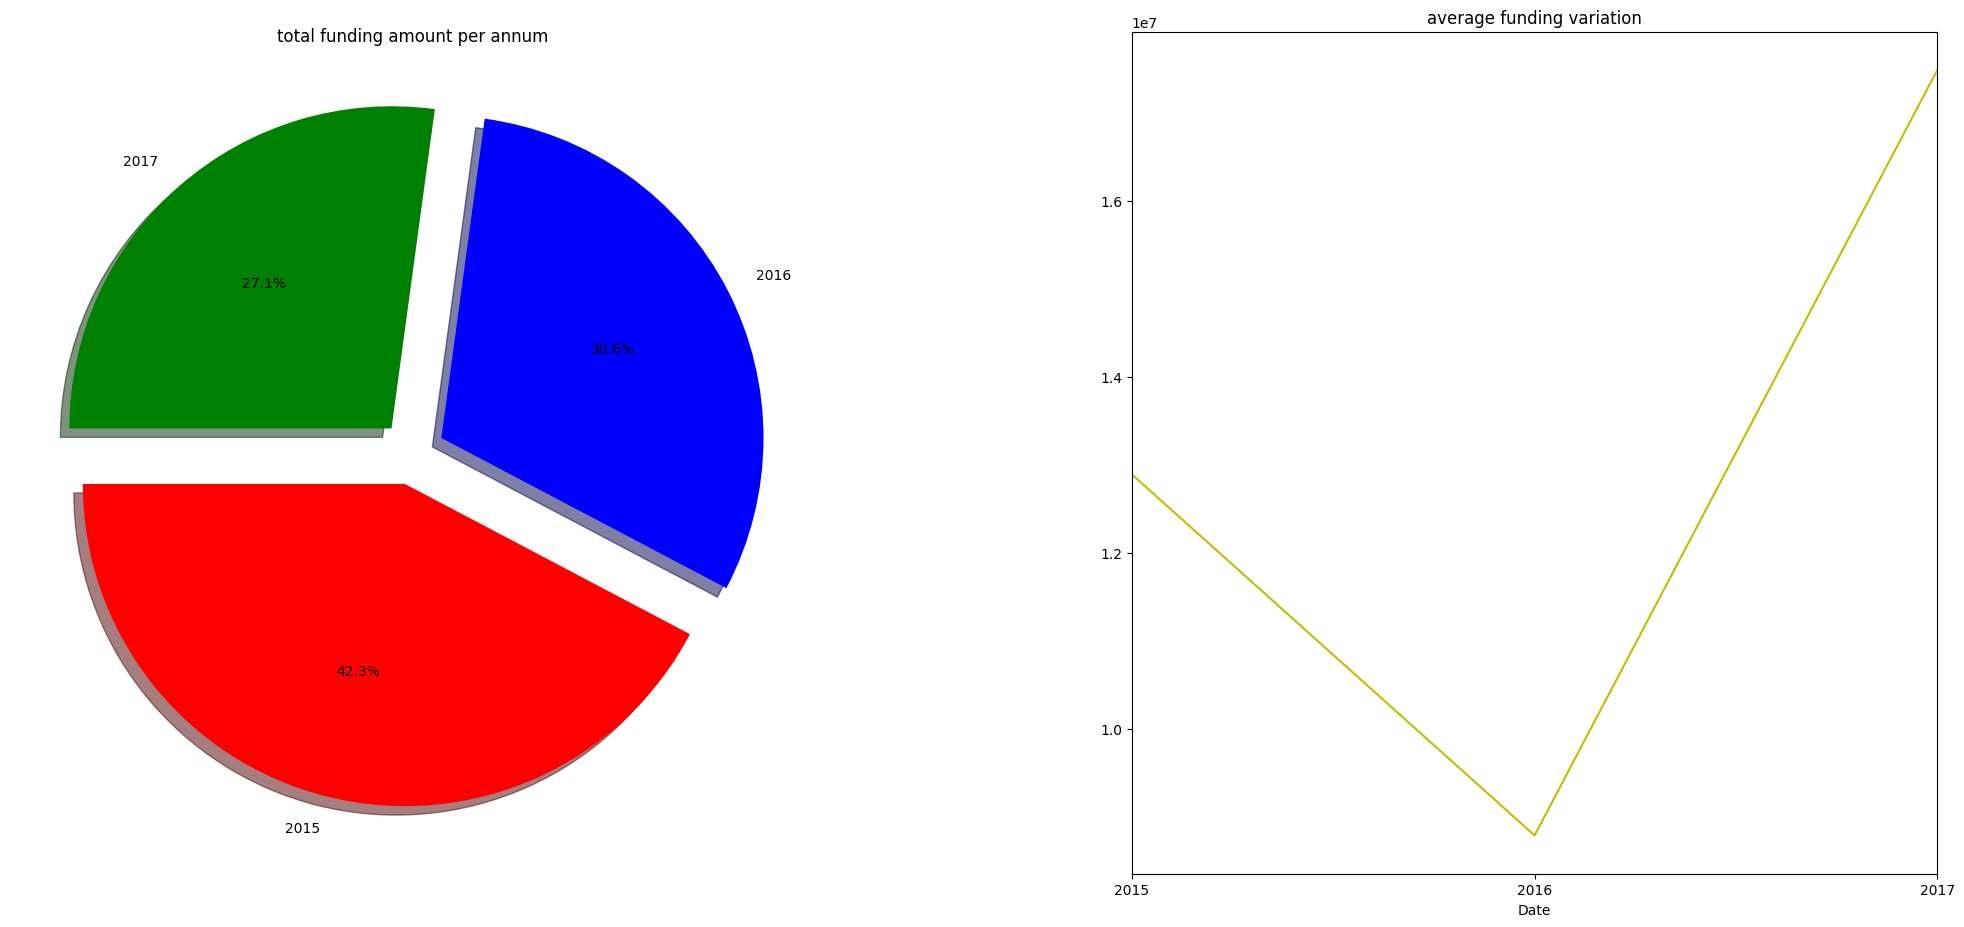

In [ ]:
a=dnewdf['AmountInUSD'].resample('AS').sum()
fig,ax=plt.subplots(nrows=1,ncols=2)

fig.tight_layout(pad=3) # Or equivalently,  "plt.tight_layout()"
fig.set_figheight(11)
fig.set_figwidth(24)

explode = (0.1, 0.1, 0.1)
ax[0].pie(a,autopct='%1.1f%%',shadow=True,startangle=180,explode=explode,colors=['red','blue','green'],labels=['2015','2016','2017'])
ax[0].set_title('total funding amount per annum')

q.plot(color='y',ax=ax[1])
ax[1].set_title('average funding variation')
plt.show()


### Total variation of funding amount per month in period of 2015-2017

In [ ]:
newdf['year']=newdf['Date'].dt.year
newdf['month']=newdf['Date'].dt.month

Text(0.5, 1.0, 'Funding Variation Per Month from 2015-2017')

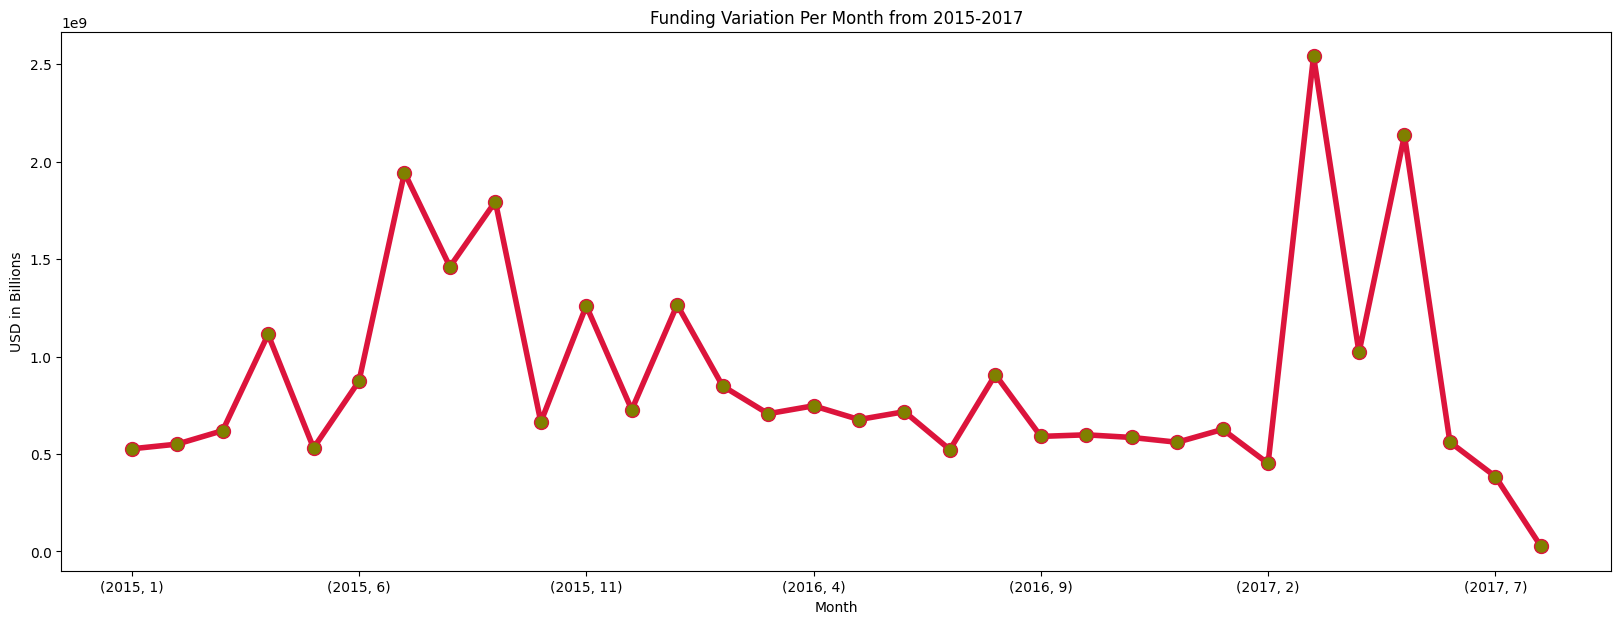

In [ ]:
fig =plt.figure(figsize=(20,7))
fig.set_figheight
ts_month = newdf.groupby(['year', 'month']).agg({'AmountInUSD':'sum'})['AmountInUSD']
ts_month.plot(linewidth=4, color='crimson',marker="o", markersize=10, markerfacecolor='olive')
plt.ylabel('USD in Billions')
plt.xlabel('Month');
plt.title('Funding Variation Per Month from 2015-2017')


### Insights of 2015
- Below we can visualize that total funding reached to its peak between the months of june - july and Aug - Sep
- End week of july was most attracted to investments
- Quarter 3 was seen as the most funded quarter of 2015

<ipython-input-76-0e81c90fbf4f>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  a=dnewdf['2015'].resample('MS').sum()['AmountInUSD'].plot()
<ipython-input-76-0e81c90fbf4f>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a=dnewdf['2015'].resample('MS').sum()['AmountInUSD'].plot()
<ipython-input-76-0e81c90fbf4f>:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  a2=sns.barplot(data=dnewdf['2015'].resample('Q').sum().reset_index(),y='AmountInUSD',x=['Q1','Q2','Q3','Q4'

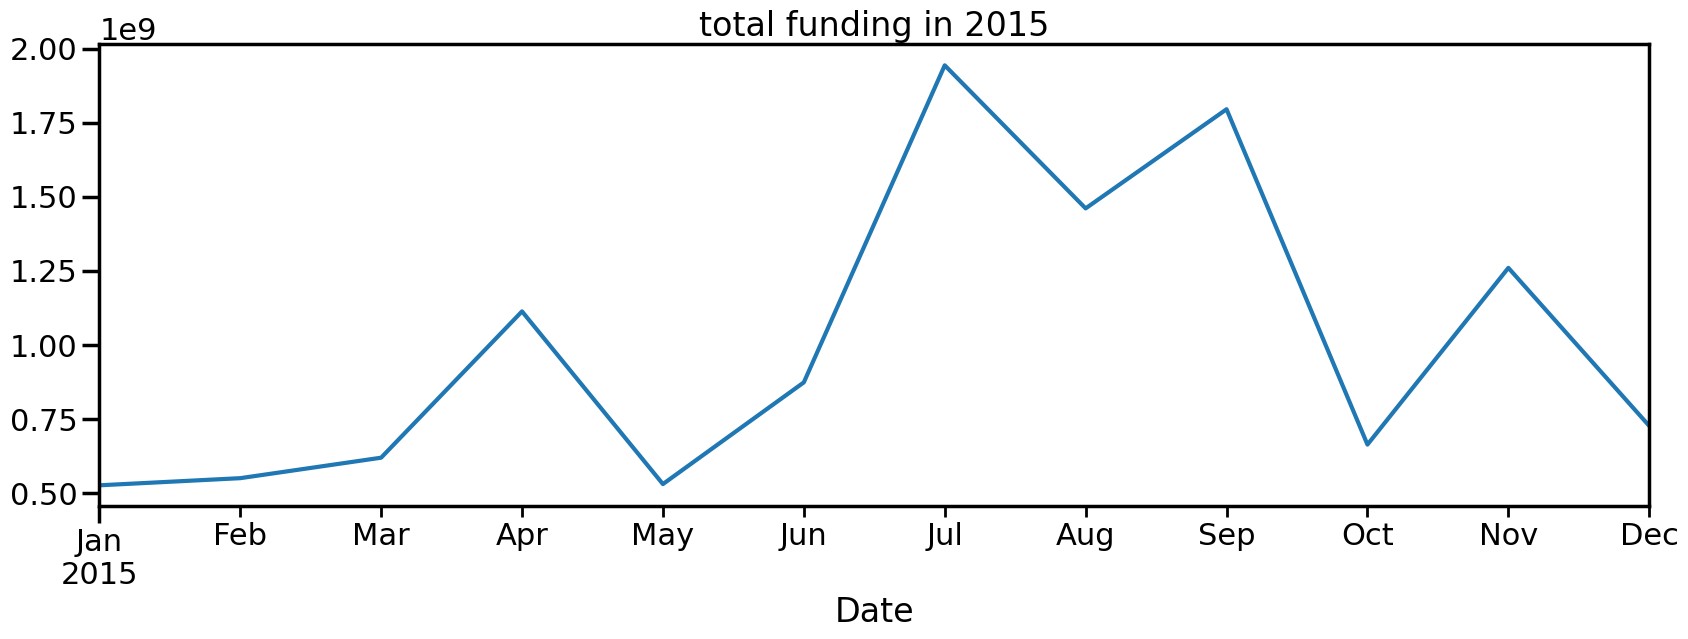

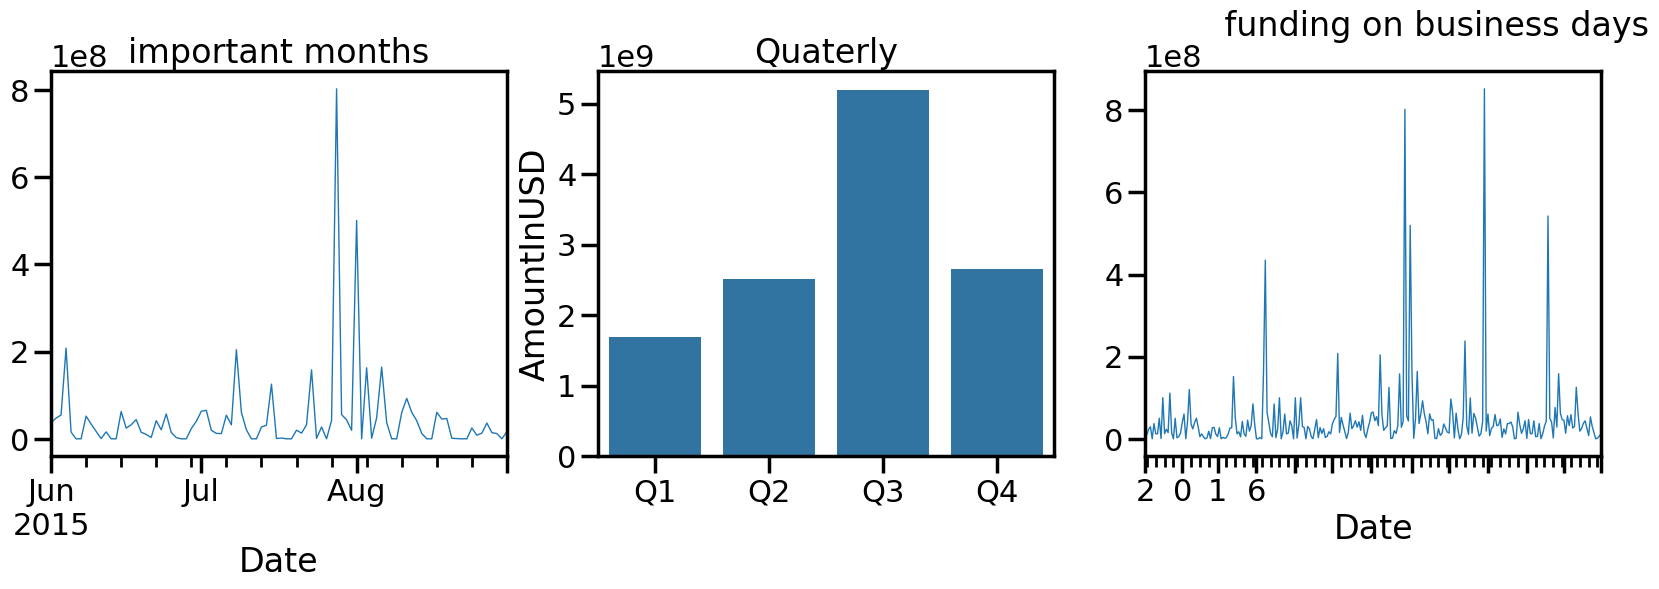

In [ ]:
sns.set_context('poster',font_scale=1)
plt.figure(figsize=(20,6))
a=dnewdf['2015'].resample('MS').sum()['AmountInUSD'].plot()
a.set_title('total funding in 2015')
#insights of june-july and augest of 2015
fig2,axes = plt.subplots(nrows=1,ncols=3,figsize=(20,5))
a1=dnewdf['2015-06':'2015-8'].resample('d')['AmountInUSD'].sum().plot(ax=axes[0],lw=1)
a1.set_title('important months')
a2=sns.barplot(data=dnewdf['2015'].resample('Q').sum().reset_index(),y='AmountInUSD',x=['Q1','Q2','Q3','Q4'],ax=axes[1])
a2.set_title('Quaterly')
a3=dnewdf['2015'].resample('B')['AmountInUSD'].sum().plot(ax=axes[2],lw=1)
a3.set_title('            funding on business days')
a3.set_xticklabels('2016')
plt.show()

###  Insights of 2016

### It seems to be january and  augest was the most funding month in  2016

- A sudden increase is witnessed in the month of july - August

- june seems to be the decline in funding may be  due to goverment administration

- further after september  uniform low funding due to demonetization of indian currency

- early weeeks of augest seems to be the most funding time

- An inverse relation among funding by  Quarter


<ipython-input-77-e45f77ceeb8c>:7: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  a=dnewdf['2016'].resample('MS').sum()['AmountInUSD'].plot()
<ipython-input-77-e45f77ceeb8c>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a=dnewdf['2016'].resample('MS').sum()['AmountInUSD'].plot()
<ipython-input-77-e45f77ceeb8c>:16: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  sns.barplot(data=dnewdf['2016'].resample('Q').sum().reset_index(),y='AmountInUSD',x=['Q1','Q2','Q3','Q4'],

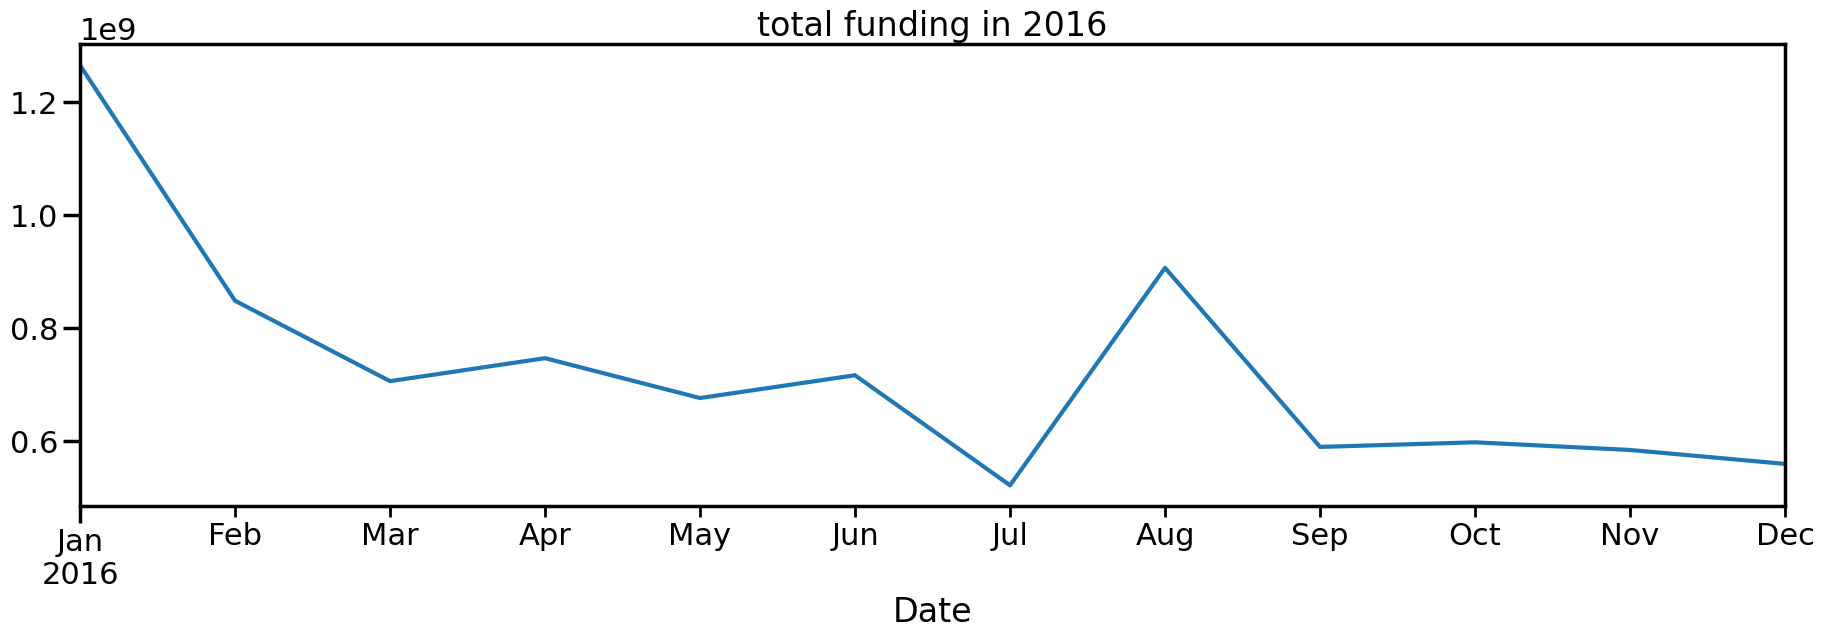

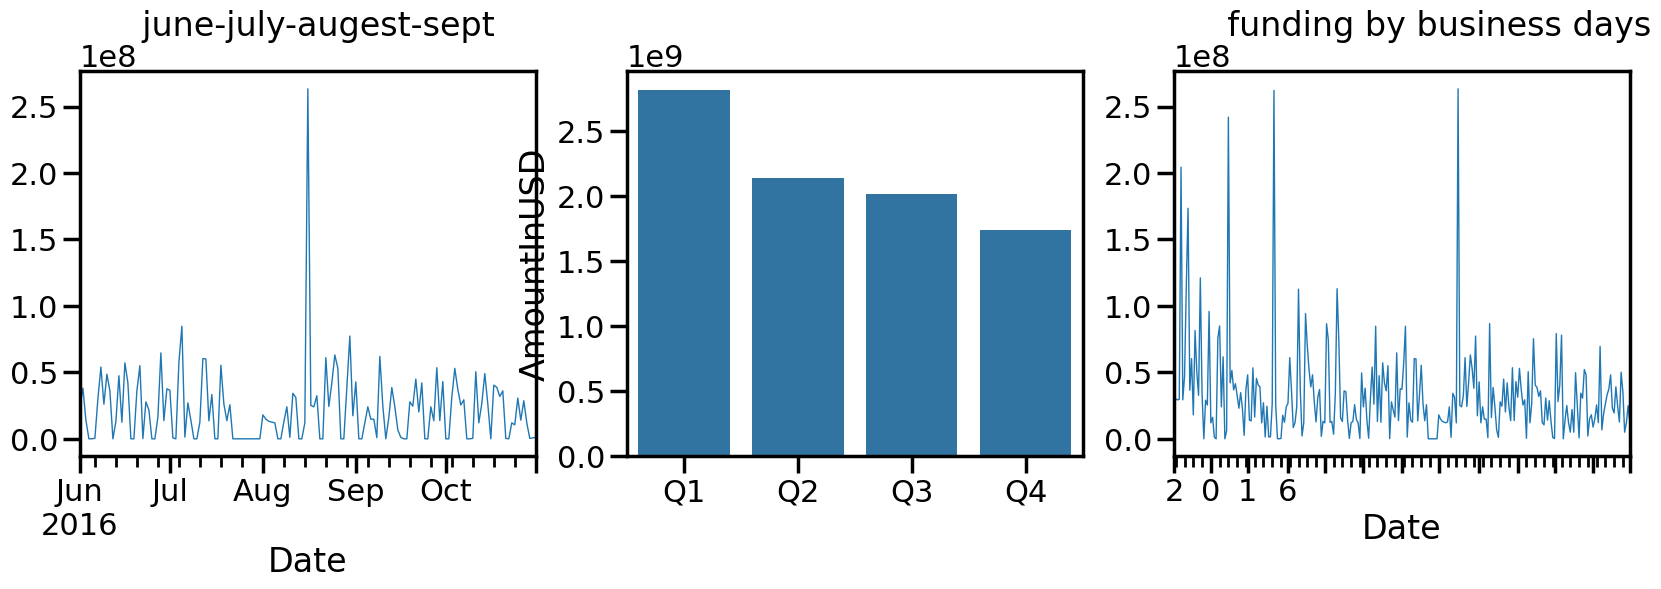

In [ ]:
sns.set_context('poster',font_scale=1)


plt.figure(figsize=(22,6))


a=dnewdf['2016'].resample('MS').sum()['AmountInUSD'].plot()
a.set_title('total funding in 2016')
#insights of june-july and augest of 2015

fig2,axes = plt.subplots(nrows=1,ncols=3,figsize=(20,5))

a1=dnewdf['2016-06':'2016-10'].resample('d')['AmountInUSD'].sum().fillna(method='ffill').plot(ax=axes[0],lw=1)
a1.set_title('  june-july-augest-sept')

sns.barplot(data=dnewdf['2016'].resample('Q').sum().reset_index(),y='AmountInUSD',x=['Q1','Q2','Q3','Q4'],ax=axes[1])
a2.set_title('Quaterly')

a3=dnewdf['2016'].resample('B')['AmountInUSD'].sum().plot(ax=axes[2],lw=1)
a3.set_title('       funding by business days')

a3.set_xticklabels('2016')
plt.show()

Insights of 2017
- Month of March and second Week of May had seen peak funding scenarios
- Quarter 2 has most funding  

<ipython-input-78-3f67fc69f621>:7: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  a=dnewdf['2017'].resample('MS').sum()['AmountInUSD'].plot()
<ipython-input-78-3f67fc69f621>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a=dnewdf['2017'].resample('MS').sum()['AmountInUSD'].plot()
<ipython-input-78-3f67fc69f621>:12: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  a1=dnewdf['2017-02':'2017-6'].resample('d')['AmountInUSD'].sum().fillna(method='ffill').plot(ax=axes[0],lw=1)
<ipython-input-78-3f67fc69f621>:15: FutureWarning

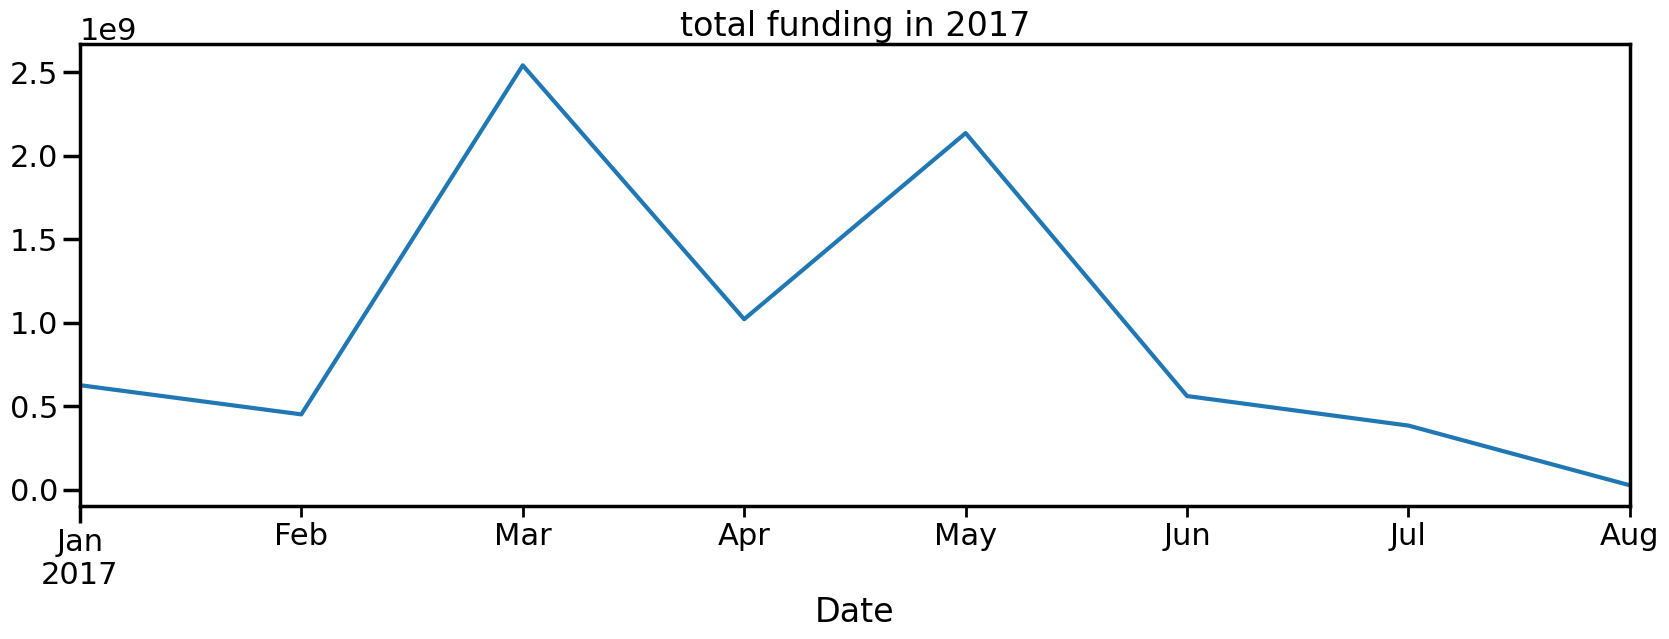

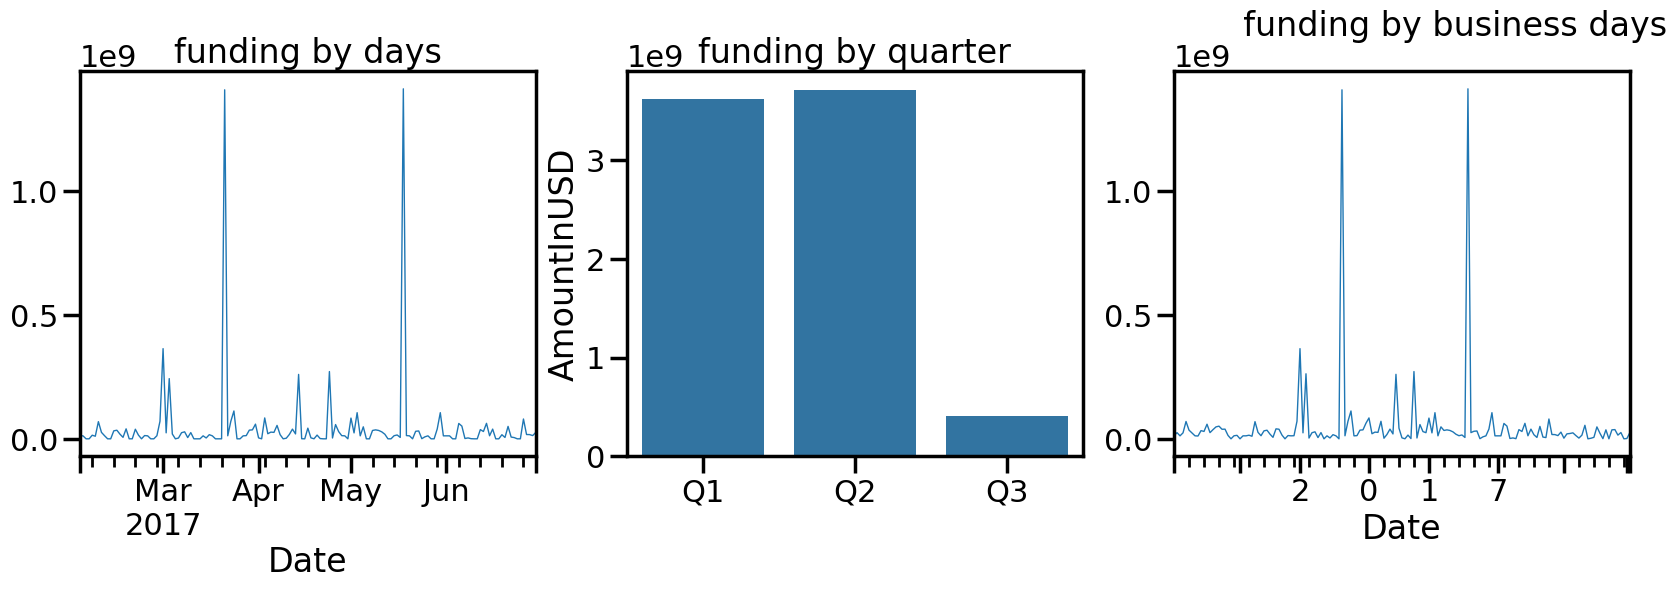

In [ ]:
sns.set_context('poster',font_scale=1)


plt.figure(figsize=(20,6))


a=dnewdf['2017'].resample('MS').sum()['AmountInUSD'].plot()
a.set_title('total funding in 2017')
#insights of june-july and augest of 2015

fig2,axes = plt.subplots(nrows=1,ncols=3,figsize=(20,5))
a1=dnewdf['2017-02':'2017-6'].resample('d')['AmountInUSD'].sum().fillna(method='ffill').plot(ax=axes[0],lw=1)
a1.set_title('funding by days')

a2=sns.barplot(data=dnewdf['2017'].resample('Q').sum().reset_index(),y='AmountInUSD',x=['Q1','Q2','Q3'],ax=axes[1])
a2.set_title('funding by quarter')

a3=dnewdf['2017'].resample('B')['AmountInUSD'].sum().plot(ax=axes[2],lw=1)
a3.set_title('          funding by business days')
a3.set_xticklabels('  2017')
plt.show()

 ###  Quartely  amount of investment

-  Quaterly funding is found to be normally distributed
-  Funding is highest in 3rd Quarter of 2015

<ipython-input-79-d2fdbc1b1d30>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dft=dnewdf.resample('Q').sum()
<ipython-input-79-d2fdbc1b1d30>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.distplot(dnewdf.resample('q').sum()['AmountInUSD'],ax=ax[1])
<ipython-input-79-d2fdbc1b1d30>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
http

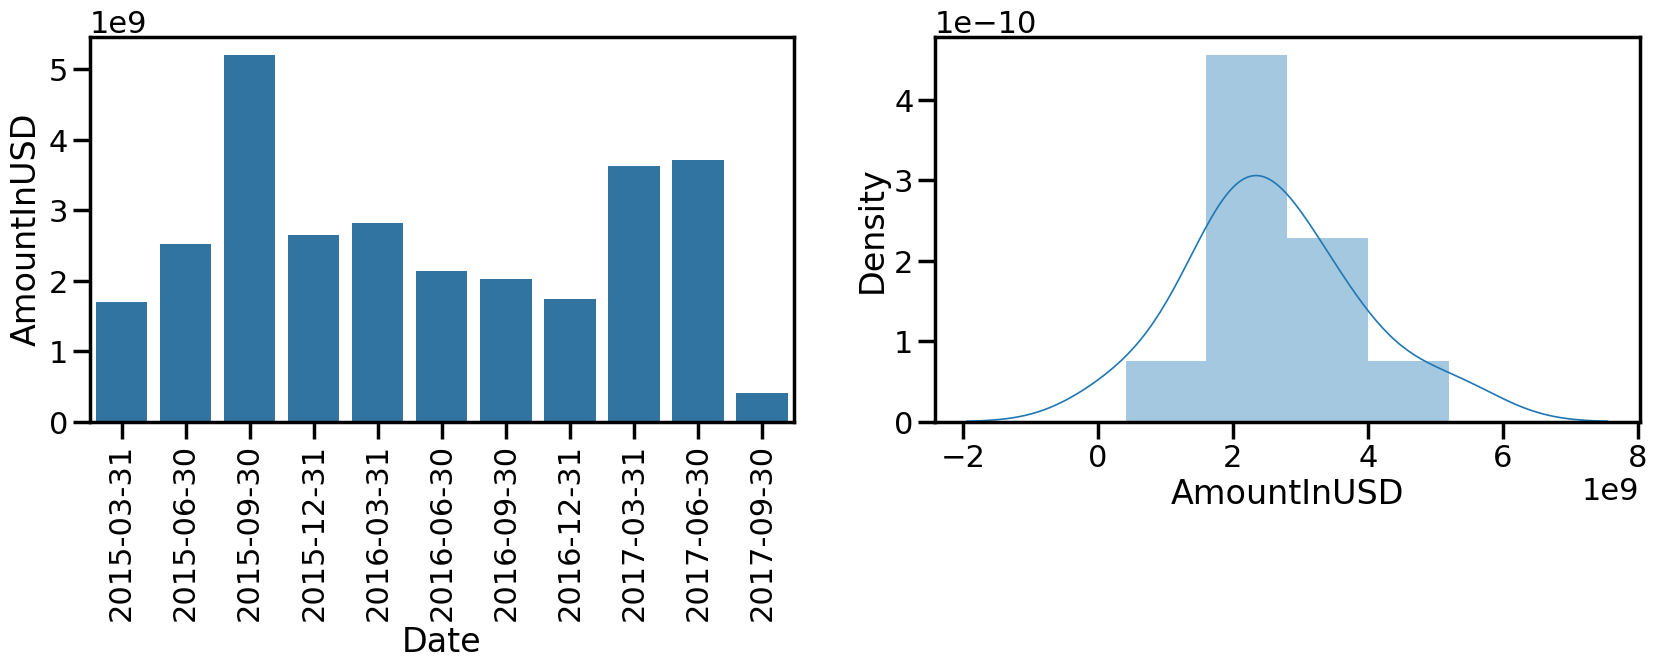

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(20,5))

sns.set_context('paper',font_scale=2)
dft=dnewdf.resample('Q').sum()
dft.index=dft.reset_index()['Date'].apply(lambda x: x.date())
a=sns.barplot(data=dft.reset_index(),x='Date',y='AmountInUSD',ax=ax[0])

plt.sca(ax[0])
plt.xticks(rotation=90)
plt.title('')

sns.distplot(dnewdf.resample('q').sum()['AmountInUSD'],ax=ax[1])

plt.show()

### Quaterly variation in Funding Amount

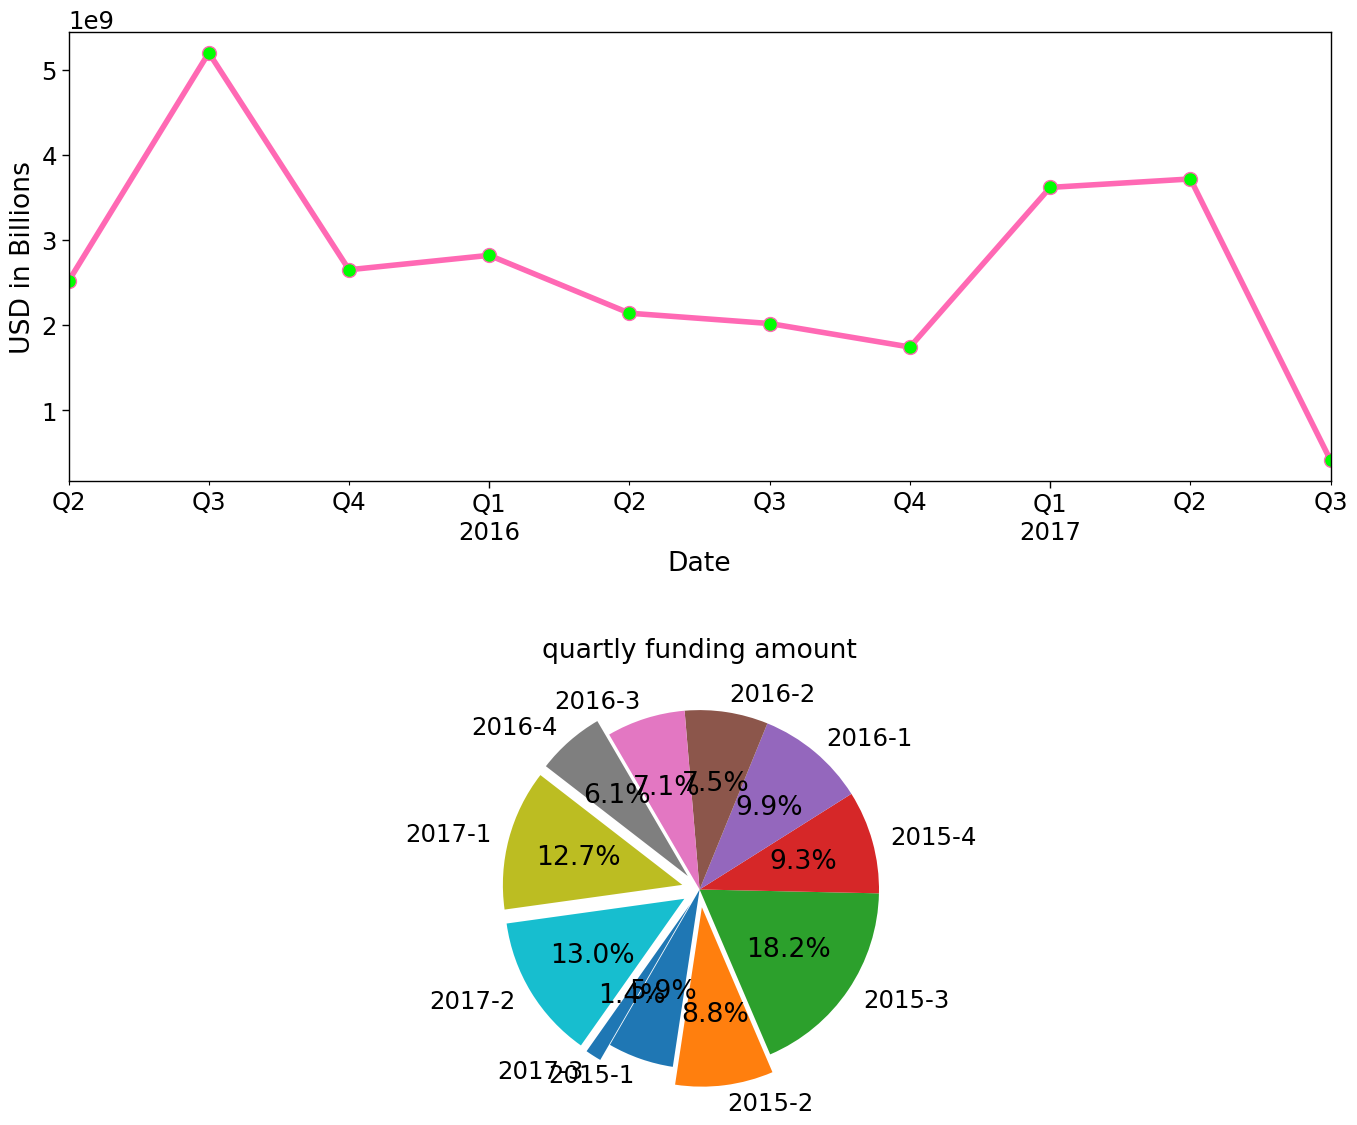

In [ ]:

fig,ax=plt.subplots(nrows=2,ncols=1)
fig.set_figheight(13)
fig.set_figwidth(15)
ax[0].set_ylabel('USD in Billions')
quarter=dnewdf['AmountInUSD'].resample('Q').sum().astype('int')
quarter[1:].plot(linewidth=4, color='hotpink', marker="o", markersize=10, markerfacecolor='lime',ax=ax[0])
fig.tight_layout(pad=3) # Or equivalently,  "plt.tight_layout()"
plt.title('quartly funding amount')
explodes = (0,0.1, 0., 0,0,0,0,0.1,0.1,0.1,0.1)
ax[1].pie(quarter[0:],autopct='%1.1f%%',startangle=240,explode=explodes,labels=['2015-1','2015-2','2015-3','2015-4','2016-1','2016-2','2016-3','2016-4','2017-1','2017-2','2017-3'])

plt.show()


- In 2015 and 2016 the average funding was in the starting and mid quarters
- but in 2017 the average funding changed to mid to last quarters

- the pattern of average funding in 2015 vs 2017 is totally opposite

<ipython-input-81-6154bdd576ca>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.kdeplot(dnewdf.resample('q').mean()['AmountInUSD']['2015'],ax=axes[0])
<ipython-input-81-6154bdd576ca>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.kdeplot(dnewdf.resample('q').mean()['AmountInUSD']['2016'],ax=axes[1])
<ipython-input-81-6154bdd576ca>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.kdeplot(dnewdf.resample

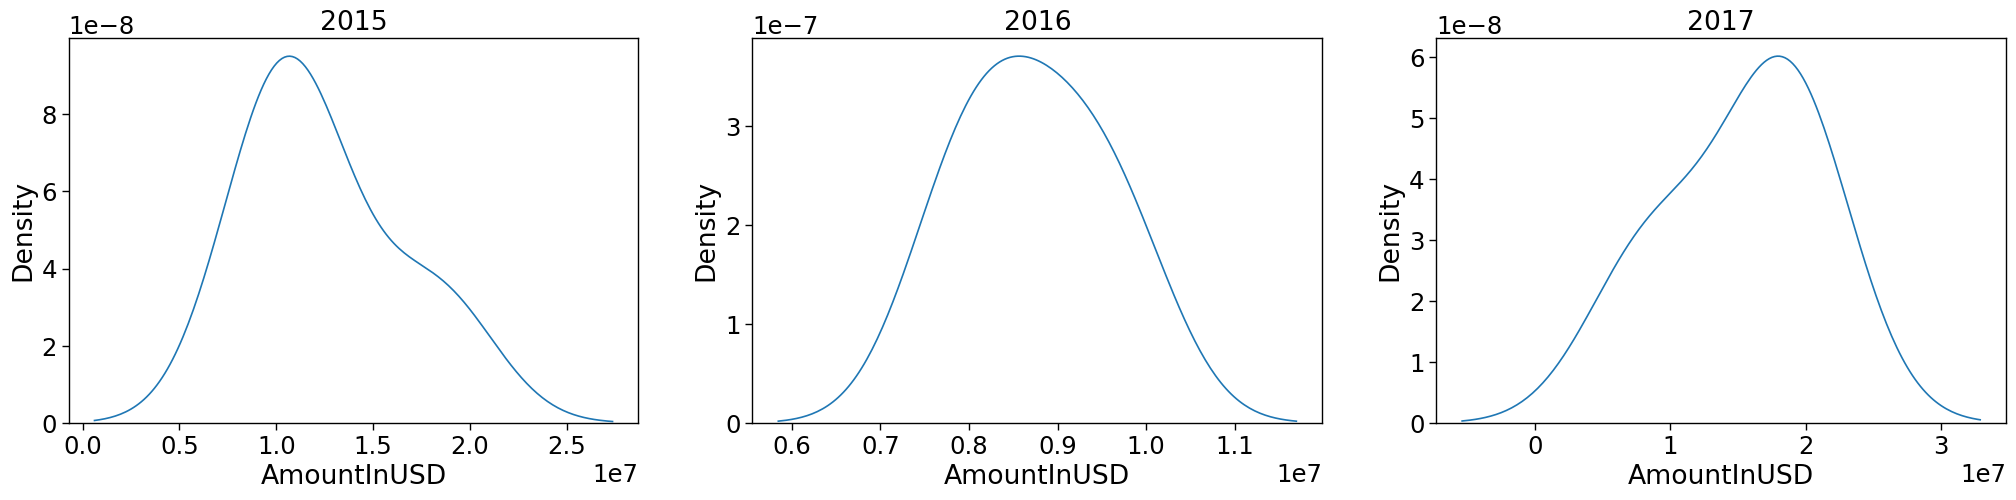

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(25,5))

plt.sca(axes[0])
plt.title('2015')
sns.kdeplot(dnewdf.resample('q').mean()['AmountInUSD']['2015'],ax=axes[0])

plt.sca(axes[1])
plt.title('2016')
sns.kdeplot(dnewdf.resample('q').mean()['AmountInUSD']['2016'],ax=axes[1])

plt.sca(axes[2])
plt.title('2017')
sns.kdeplot(dnewdf.resample('q').mean()['AmountInUSD']['2017'],ax=axes[2])
plt.show()

 Private equity is seen to be most favourable Investment Mode for high funding amount per startup

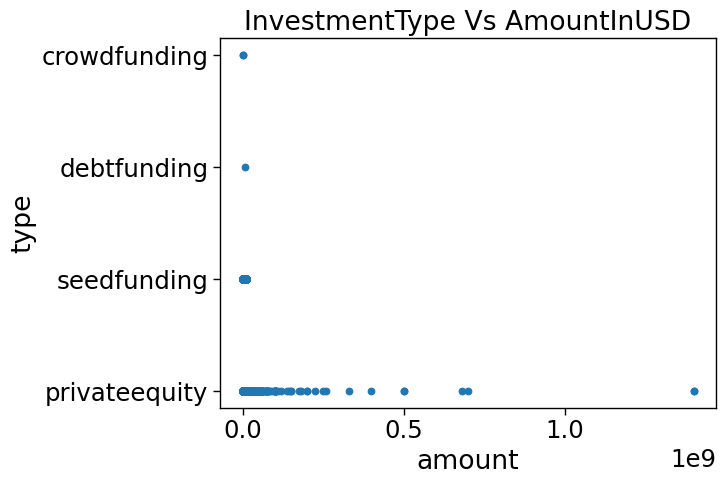

In [ ]:
plt.scatter(x=newdf['AmountInUSD'],y=newdf['InvestmentType'])
plt.title('InvestmentType Vs AmountInUSD')
plt.xlabel('amount')
plt.ylabel('type')
plt.show()

### Investment type in 2015



- Private equity is more dispersed according to amount funded  
 and more amount is invested through private equity per startup on the otherhand
 seed funding is less dispersed according to amount funded and low amount is funded using this but
 frequency of seed funding is more as compared to private equity
- No dept funding occured in 2015

<ipython-input-83-8807dd330101>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  d2015=dnewdf['2015']


Axes(0.125,0.11;0.775x0.77)
seedfunding      499
privateequity    435
crowdfunding       2
Name: InvestmentType, dtype: int64


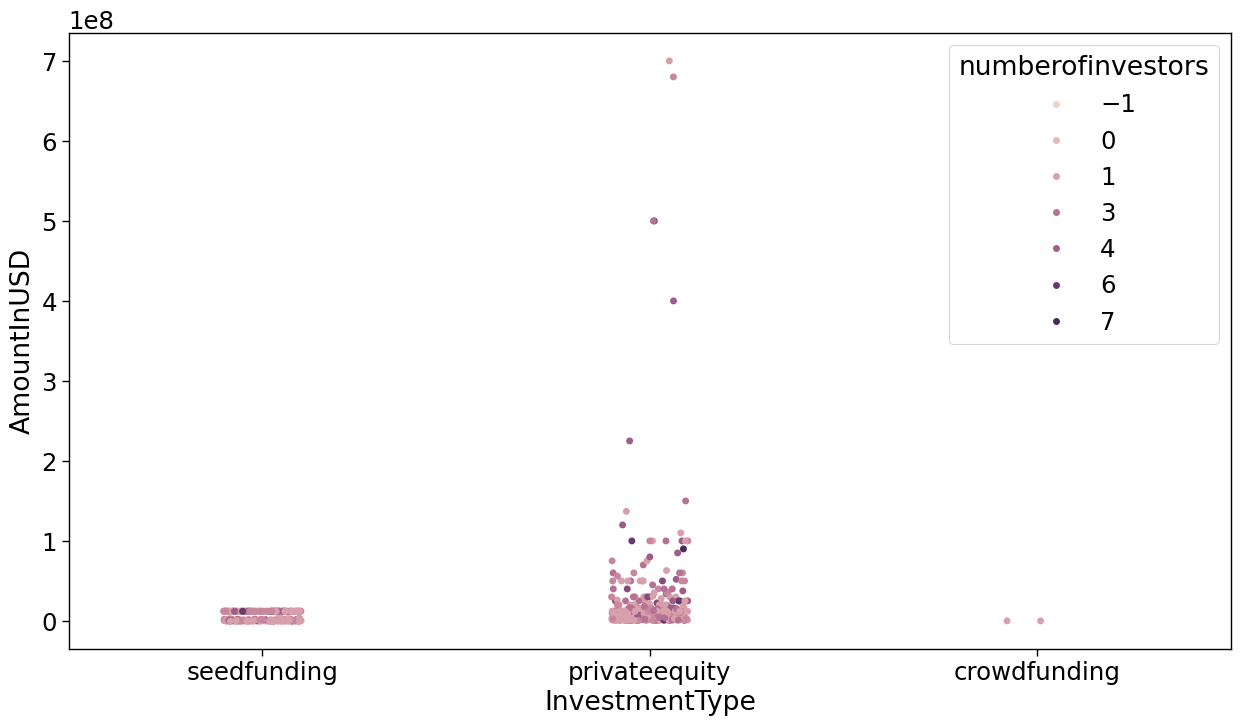

In [ ]:
plt.figure(figsize=(15,8))
d2015=dnewdf['2015']
print(sns.stripplot(data=d2015,x='InvestmentType',y='AmountInUSD',jitter=True,hue='numberofinvestors'))

print(d2015['InvestmentType'].value_counts())
d2015[d2015['InvestmentType']=='privateequity'].sort_values(by='AmountInUSD',ascending=False).head(5)
plt.show()

- Private equity is more dispersed according to amount funded
 and more amount is invested through private equity per startup on the otherhand seed funding is less dispersed         according to amount funded and low amount is funded using this but frequency of seed funding is more as compared
 to private equity

- As compared to 2015v seed funding has slightly more deviated
- No dept funding and crowd funding occured in 2016
- Snapdeal and makemytrip was funded most via private equity

Axes(0.125,0.11;0.775x0.77)
seedfunding      587
privateequity    406
Name: InvestmentType, dtype: int64


<ipython-input-84-2ebbeff6150b>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  d2016=dnewdf['2016']


,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,numberofinvestors
Date,,,,,,,,
2016-02-15,snapdeal,ecommerce,horizontalonlinemarketplace,newdelhi,Ontario Teachers’ Pension Plan & Others,privateequity,200000000,1
2016-01-07,makemytrip,consumerinternet,onlinetravel/hotelbookingplatform,gurgaon,Ctrip.com International Ltd,privateequity,180000000,1


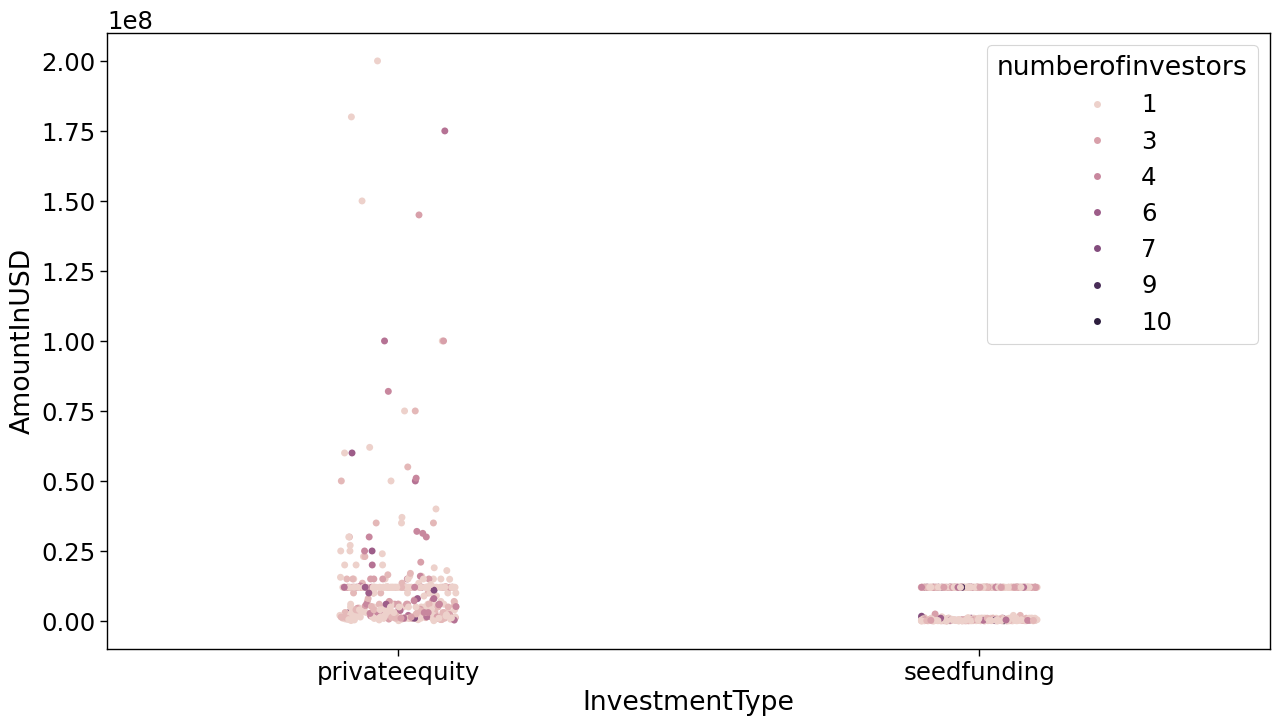

In [ ]:
plt.figure(figsize=(15,8))
d2016=dnewdf['2016']
print(sns.stripplot(data=d2016,x='InvestmentType',y='AmountInUSD',jitter=True,hue='numberofinvestors'))

print(d2016['InvestmentType'].value_counts())
d2016[d2016['InvestmentType']=='privateequity'].sort_values(by='AmountInUSD',ascending=False).head(2)

### InvestmentType In 2017
- Private Equity is not so dispersed as compared to previous two years
- Debt funding slightly taken place

>Flipkart and Paytm had max funding at once  and uncommon to others

Axes(0.125,0.11;0.775x0.77)
privateequity    226
seedfunding      216
debtfunding        1
Name: InvestmentType, dtype: int64


<ipython-input-85-6331917d3990>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  d2017=dnewdf['2017']


,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,numberofinvestors
Date,,,,,,,,
2017-03-21,flipkart,ecommerce,ecommercemarketplace,bangalore,"Microsoft, eBay, Tencent Holdings",privateequity,1400000000,3
2017-05-18,paytm,ecommerce,mobilewallet&ecommerceplatform,bangalore,SoftBank Group,privateequity,1400000000,1


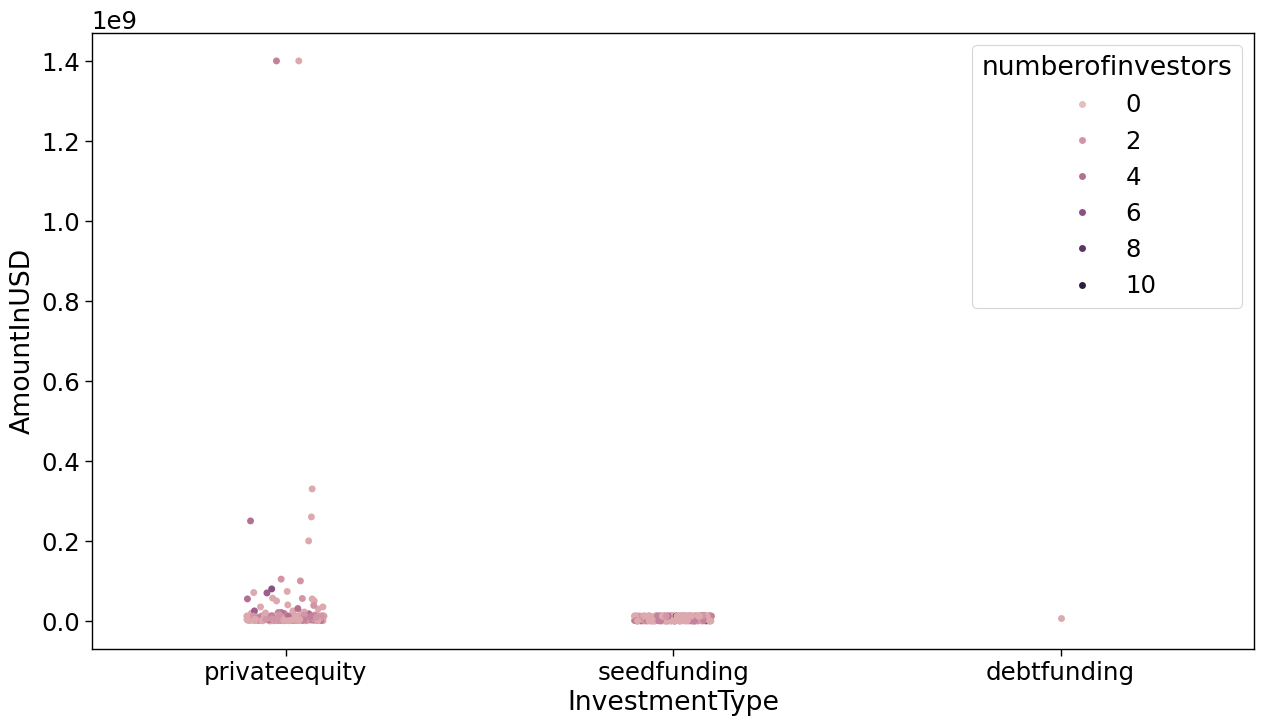

In [ ]:
plt.figure(figsize=(15,8))
d2017=dnewdf['2017']
print(sns.stripplot(data=d2017,x='InvestmentType',y='AmountInUSD',jitter=True,hue='numberofinvestors'))

print(d2017['InvestmentType'].value_counts())
d2017[d2017['InvestmentType']=='privateequity'].sort_values(by='AmountInUSD',ascending=False).head(2)

## CONCLUSION


* Funding startups are highly dispersed as investors are highly specific about choosing startups <br>
* There were more than 2000 new startups funded in the year between 2015-2017<br>
* Paytm and Flipkart were funded most <br>
* Top 10 investments are made through private equity<br>
* Paytm was mostly funded on different days by single investor<br>
* Swiggy was invested by most number of investors<br>
* As per startups 2 and 3 were most frequent combination of investors<br>
* There were 50% relation between funded amount and number of investors per startup<br>
* There were more than 1900 unique investors<br>
* Steadview capital and existing investors invested highest amount.
* E.ventures Investor  funded 115 times the most.
* Ola was Funded most frequent number of times.
* Consumer internet was the top most choice for all investors.
* Top investors funded ecommerce and consumer internet most in terms of amount.
* Most funding came through private equity<br>
* Crowd funding and dept funding were less preferred by the investors<br>
* Seed funding was less dispersed but private equity is choosen to made large investments per startup<br>
* Consumer internet sector got most ammount of funding and attracted the most investors<br>
* Banglore had the most average funding <br>
* Maximum Total  funding was generated  in the  year 2015 and then it slowly decreased with increase in years<br>
* Average funding was most in 2017<br>
* In 2015 the period of june-oct was funded most and quarter 3 was funded most<br>
* In 2016 period of june and september were most funded and quterly funding decreased with increase in time<br>
* In 2017 the period between march- may had recieved most fundings<br>
* 3rd quarter  of 2015 was invested most and funding amount was normally distributed<br>
* Starting months of 2015,mid of 2016 and 3rd Quarter of 2017 were funded most as per individual investment<br>
* 2016 had highest amount of investments<br>
* In 2015 there was slight fund generated through crowd funding<br>
* In 2016 there was slight variation in seed funding by amount<br>
* In 2017 there dept funding witnessed for first time but in less fraction as Ahmedabad seems to be an anomaly as it only witnessed the debt funding<br>
* Amount Distribution in 2017 (left skewed) was totally opposite  to 2015(right skewed) in terms of Date. 2016's Amount distribution was normally distributed